In [1]:
% pylab inline
from __future__ import division
import bayessur as BS

Populating the interactive namespace from numpy and matplotlib


In [2]:
''' Some useful things'''
from mpltools import layout
# from mpltools import style
# style.use('swkposter')
# print style.available
style.use('./ggplotswk.mplstyle')
figsize = (7.5,6)
comap = 'rainbow' 

# force aspect
def forceAspect(ax,aspect):
    xl = ax.axis()[1]-ax.axis()[0]
    yl = ax.axis()[3]-ax.axis()[2]
    ax.set_aspect(abs(xl/yl)/aspect)
    
# set colors for plotting
c1,c2,c3,c4,c5,c6,c7 = '#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8'
                   #c1 E24A33 : red
                   #c2 348ABD : blue
                   #c3 988ED5 : purple
                   #c4 777777 : gray
                   #c5 FBC15E : yellow
                   #c6 8EBA42 : green
                   #c7 FFB5B8 : pink
c1,c2,c3,c4,c5,c6,c7,c8 = '#D55E00', '#0072B2', '#009E73', '#F0E442', '#E69F00', '#56B4E9',   '#CC79A7', '#999999'

    
# letter labels
letters = ['A','B','C','D','E','F']
# example: text(-0.325,1.08,letters[i],horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,size=12)

# plot a bar
def plotbar(x,y,a,d=1,color='k',lw=2,alpha=1):
    ''' Plot a bar in location x,y
#     a - angle
    d - half length bar
    color - color
    lw - linewidth
    alpha - opacity
    '''
    plot([x-sin(a)*d,x+sin(a)*d],[y-cos(a)*d,y+cos(a)*d],color=color,linewidth=lw,alpha=alpha)

11
11


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


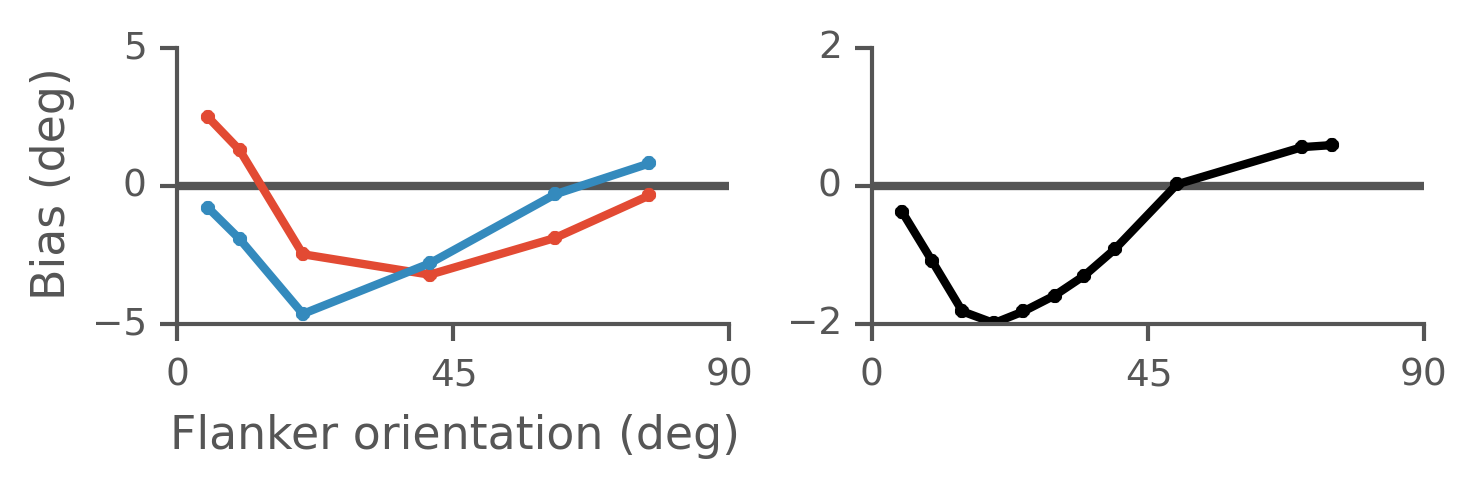

In [3]:
''' read out of tilt illusions from kapadia and others '''
style.use('./ggplotswk.mplstyle')
## setup figure
fig, axs = subplots(ncols=2, nrows=1, figsize=[figsize[0]*2/3,figsize[1]/2])
ax = axs#.ravel()

# approximately extracted data from fig 4C kapadia, averaged across 5 subjects
subplot(ax[0])
X = [5.07,10.21,20.51,41.18,61.61,76.97] # flanker angle (deg)
AlnY = [2.48,1.29,-2.48,-3.22,-1.89,-0.35]  # bias (deg) (negative is attractive) aligned case
LatY = [-0.8,-1.93,-4.64,-2.81,-0.31,0.81]  # bias (deg) (negative is attractive) lateral case
plot([0,90],[0,0],color= '#555555')
plot(X,AlnY,'.-')
plot(X,LatY,'.-')

# approximately extracted data from fig 1 schwartz dayan
subplot(ax[1])
X = [4.97,9.84,14.78,19.93,24.72,29.80,34.67,39.60,49.73,70.15,75.08] # flanker angle (deg)
Y = [0.38,1.09,1.82,1.99,1.82,1.59,1.30,0.92,-0.02,-0.56,-0.59] # average of 4 subjects, bias. postive is repulsive, so do minus
plot([0,90],[0,0],color= '#555555')
print len(X)
print len(Y)
plot(X,-array(Y),'k.-')

# set axes etc.
for i in range(len(ax)):
    subplot(ax[i])
    xticks(linspace(0,90,3))
subplot(ax[0])
ylim(-5,5)
yticks(linspace(-5,5,3))
subplot(ax[1])
ylim(-2,2)
yticks(linspace(-2,2,3))
subplot(ax[0])
xlabel('Flanker orientation (deg)')
ylabel('Bias (deg)')



## make all plots proper rectangle
for i in range(0,len(ax)):
    forceAspect(ax[i],aspect=2)

# remove top bottom ticks
for i in range(len(ax)):
    layout.cross_spines(ax=ax[i])
    
# ## prevent text overlap
fig.tight_layout()


## save figures 
# savefig('finalFigs/exctractedillusion.eps', bbox_inches='tight')

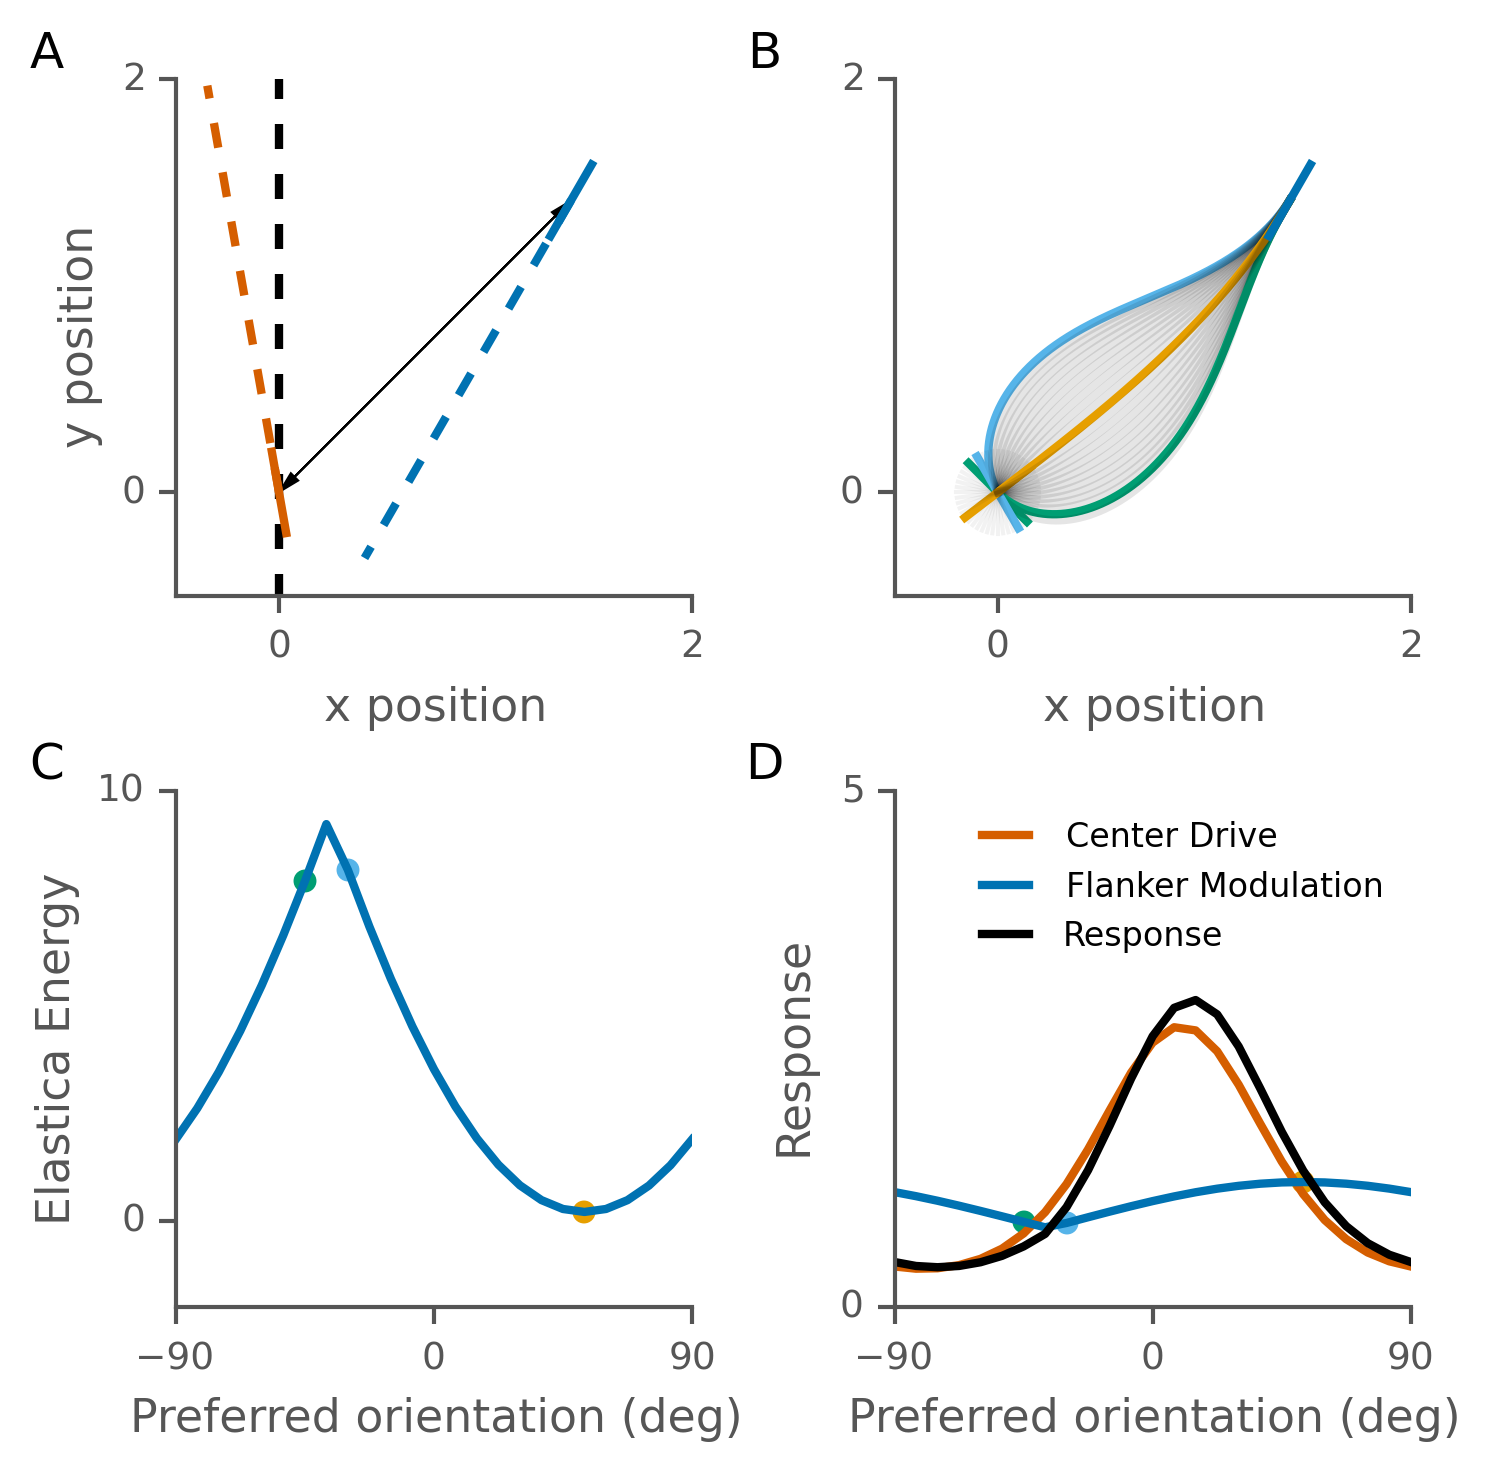

In [10]:
''' Methods
Simple figure explaining how to find the smoothest target, and the final center orientation likelihood
First do the corresponding curves, then do the elastica energy and modulation

'''
### plot scene, then plot connections
# style.use('ggplotswk')
## setup figure
fig, axs = subplots(ncols=2, nrows=2, figsize=[figsize[0]*2/3,figsize[1]])
ax = axs.ravel()

# load data
data = np.load('data/MethodsScene.npy')[()]
angs = data['angs']*180/pi # x-axis, center orientations
E = data['E']  # Curvature energy as a function of center (true)
# cdrive = data['Cdrive']  # drive from center
# fmod = data['ModTrue'] # flanker modulation, true
c = data['c']  # center orientation
f = data['f']  # flanker orientation
rf = data['rf']
cdrive = exp(cos(2*(angs*pi/180-10*pi/180)))
fmod = exp(-0.1*(E-4)/rf)
r = cdrive*fmod
phif = data['phi'] 
xf = rf*sin(phif)
yf = rf*cos(phif)
X,Y = data['x,y'] # x and y coordinates of all the curves cooresponding to the energies
l = 0.4 # length any plotted bars

# plot the flankers with definitions (or at least a few of them)
subplot(ax[0])
plot([0,0],[-1,2],'k--') # y-axis ref
plot([0,2*sin(c)],[0,2*cos(c)],'--',color=c1) # c orientation ref
plot([xf,xf-2*sin(f)],[yf,yf-2*cos(f)],'--',color=c2) # f orientation ref
plotbar(0,0,c,d=l/2,color=c1,lw=2,alpha=1)
plotbar(xf,yf,f,d=l/2,color=c2,lw=2,alpha=1)

arrow(xf/2, yf/2, -xf/2+0.075, -yf/2+0.075, head_width=0.05, head_length=0.1, fc='k', ec='k')
arrow(xf/2, yf/2, xf/2-0.075, yf/2-0.075, head_width=0.05, head_length=0.1, fc='k', ec='k')

# plot curves in gray
subplot(ax[1])
colors = [c3,c6,c5,c4]
count = 0
colored = [6,8,19,1000]
for i in arange(0,len(X[:,0])-1,1):
    color = 'k'
    alpha = 0.1
    if i == colored[count]:
        color = colors[count]
        count+=1
        alpha = 1
        
    x = X[i,:]
    y = Y[i,:]
    plot(x,y,color=color,alpha=alpha)
    if alpha ==1:
        plotbar(0,0,angs[i]*pi/180,d=l/2,color=color,lw=2,alpha=alpha)
    else:
        plotbar(0,0,angs[i]*pi/180,d=l/2,color=color,lw=1,alpha=alpha/2)

plotbar(xf,yf,f,d=l/2,color=c2,lw=2,alpha=1)

# axis('off')
## plot curvature energy E
subplot(ax[2])
plot(angs,E,color=c2)

for i in range(3):
    x = angs[colored[i]]
    y = E[colored[i]]
    scatter(x,y,color=colors[i],s = 25)

## plot prob distributions
subplot(ax[3])
plot(angs,cdrive,color=c1,label='Center Drive')
plot(angs,fmod,color = c2,label='Flanker Modulation')
plot(angs,r,color='k',label='Response')
legend(fontsize=8)

# plot example colors from panel B
for i in range(3):
    x = angs[colored[i]]
    y = fmod[colored[i]]
    scatter(x,y,color=colors[i],s=25)


## set ticks and labels
subplot(ax[0])
xlabel('x position')
ylabel('y position')
xticks(linspace(-0,2,2))
yticks(linspace(-0,2,2))
xlim(-0.5,2)
ylim(-0.5,2)
subplot(ax[1])
xlabel('x position')
xticks(linspace(-0,2,2))
yticks(linspace(-0,2,2))
xlim(-0.5,2)
ylim(-0.5,2)

subplot(ax[2])
xlabel('Preferred orientation (deg)')
ylabel('Elastica Energy')
xticks(linspace(-90,90,3))
xlim(-90,90)
yticks(linspace(0,10,2))
subplot(ax[3])
xlabel('Preferred orientation (deg)')
ylabel('Response')
xticks(linspace(-90,90,3))
yticks(linspace(0,5,2))
xlim(-90,90)


## Add letter labels
for i in range(len(ax)):
    subplot(ax[i])
    text(-0.25,1.05,letters[i],horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,size=12)
    
## make all plots square
for i in range(0,len(ax)):
    forceAspect(ax[i],aspect=1)

## remove top bottom ticks
for i in range(0,len(ax)):
    layout.cross_spines(ax=ax[i])
    
## prevent text overlap
fig.tight_layout(h_pad=-7)

## save figures 
savefig('finalFigs/methodsraw.pdf', bbox_inches='tight')

10


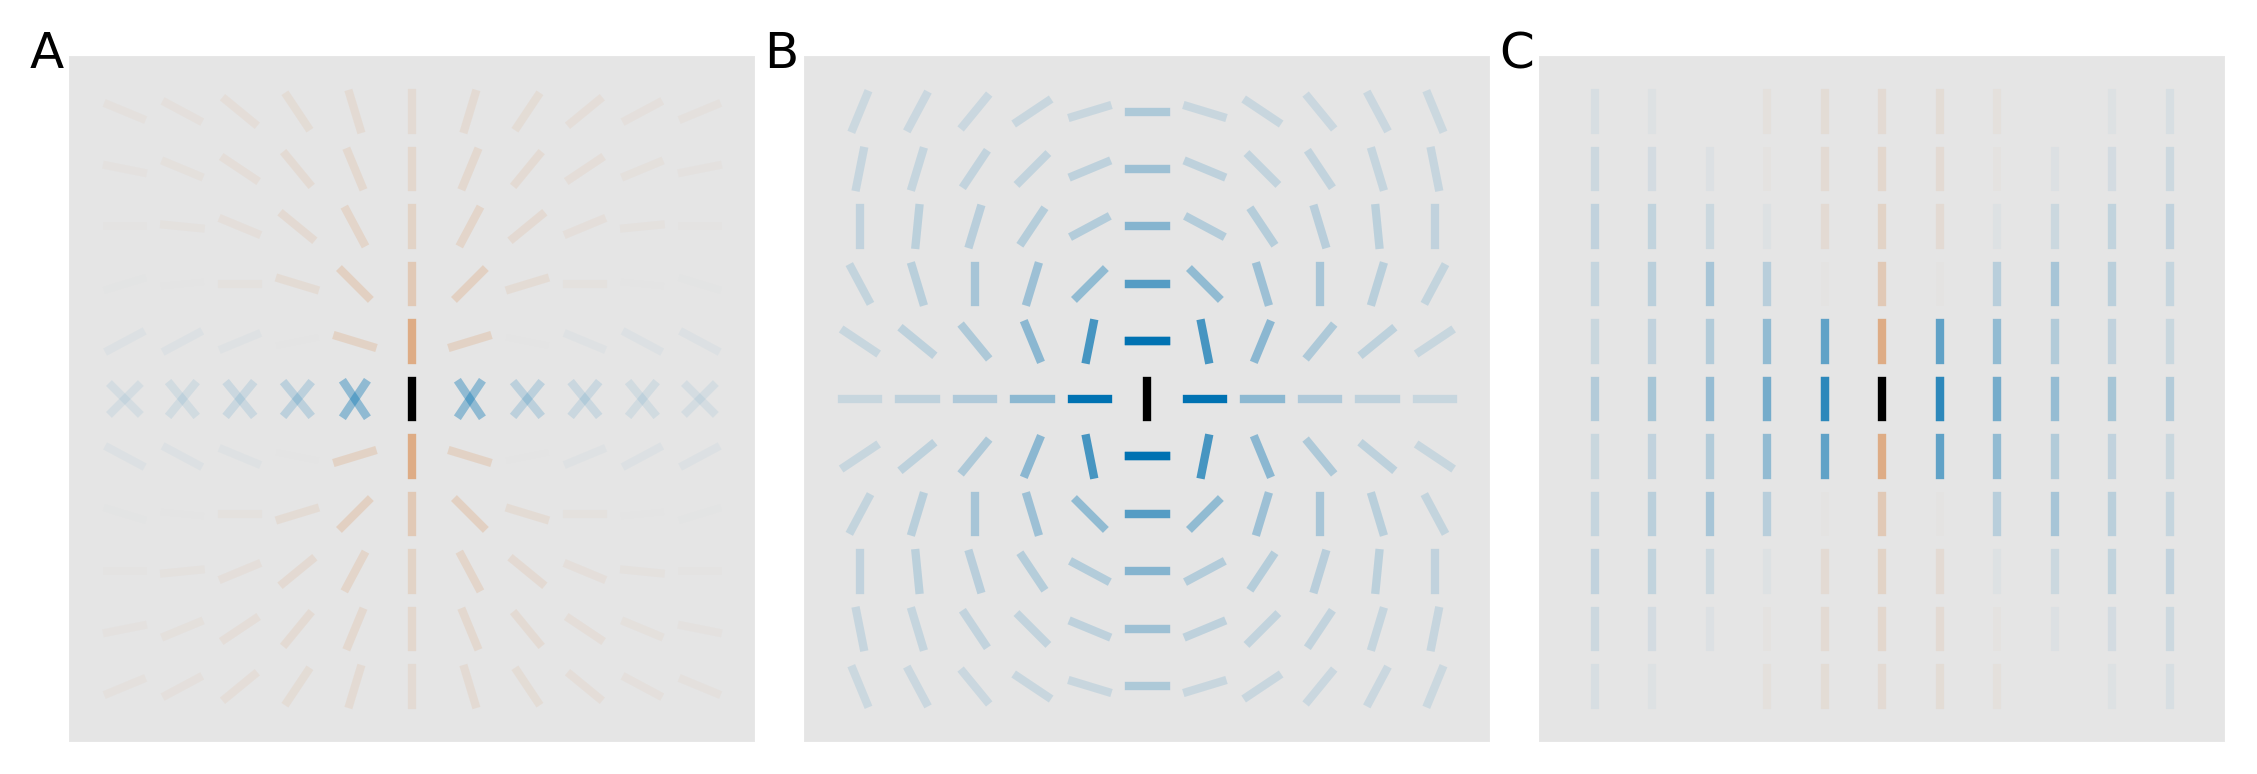

In [25]:
''' Results 1: one flanker
What flankers most excite/inhibit given a position relative to center neuron's preferred orientation and position
'''
## modelled load data
data = np.load('data/resultsOneFlanker.npy')[()] 
mods = data['mods'] # modulation values
xys = data['xys']   # x and y  values
ang = data['ang'] # ang 
style.use('ggplot')

## setup figure
fig, axs = subplots(ncols=3, nrows=1, figsize=[figsize[0],figsize[1]])
ax = axs.ravel()

## plot the highest influences, inhibitory or excitatory
l=0.8
for j, x in enumerate(xys/2):
    print '\r',
    print j,
    for i, y in enumerate(xys/2):
        if x != 0 or y != 0:
            subplot(ax[0]) # most positive modulation
            k = argmax(mods[i,j,:])
            f = ang[k]
            if mods[i,j,k] < 0:
                alpha = abs(mods[i,j,k])
                c = c2
            else:
                alpha = mods[i,j,k]
                c = c1
            plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],color=c,linewidth=2,alpha = alpha)
            if round(y,10) == 0:
                f = -f
                plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],color=c,linewidth=2,alpha = alpha)
            subplot(ax[1]) # least positive modulation
            k = argmin(mods[i,j,:])
            f = ang[k]
            if mods[i,j,k] < 0:
                alpha = abs(mods[i,j,k])
                c = c2
            else:
                alpha = mods[i,j,k]
                c = c1
            plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],color=c,linewidth=2,alpha = alpha)
            if round(x,10) == 0:
                f = -f
                plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],color=c,linewidth=2,alpha = alpha)
                
            subplot(ax[2]) # same bar orientation as preferred bar in middle
            k = 16#argmax(mods[i,j,:])
            f = ang[k]
            if mods[i,j,k] < 0:
                alpha = abs(mods[i,j,k])
                c = c2
            else:
                alpha = mods[i,j,k]
                c = c1
            plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],color=c,linewidth=2,alpha = alpha)
            if round(y,10) == 0:
                f = -f
                plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],color=c,linewidth=2,alpha = alpha)
        else:
            f=0
            subplot(ax[0])
            plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],'k',linewidth = 2)
            subplot(ax[1])
            plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],'k',linewidth = 2)
            subplot(ax[2])
            plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],'k',linewidth = 2)



## Add letter labels
for i in range(len(ax)):
    subplot(ax[i])
    text(-0.03,1,letters[i],horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,size=12)
    
## make all plots square
for i in range(0,len(ax)):
    forceAspect(ax[i],aspect=1)

## remove top bottom ticks
for i in range(0,len(ax)):
    subplot(ax[i])
#     layout.cross_spines(ax=ax[i])
    xticks([])
    yticks([])
#     ax[i].xaxis.set_ticklabels([])
#     ax[i].yaxis.set_ticklabels([])
#     grid('off')
## prevent text overlap
fig.tight_layout()

## save figures 
savefig('finalFigs/resultsOneFlanker.pdf', bbox_inches='tight') # cannot save as eps because opacity is not compatible



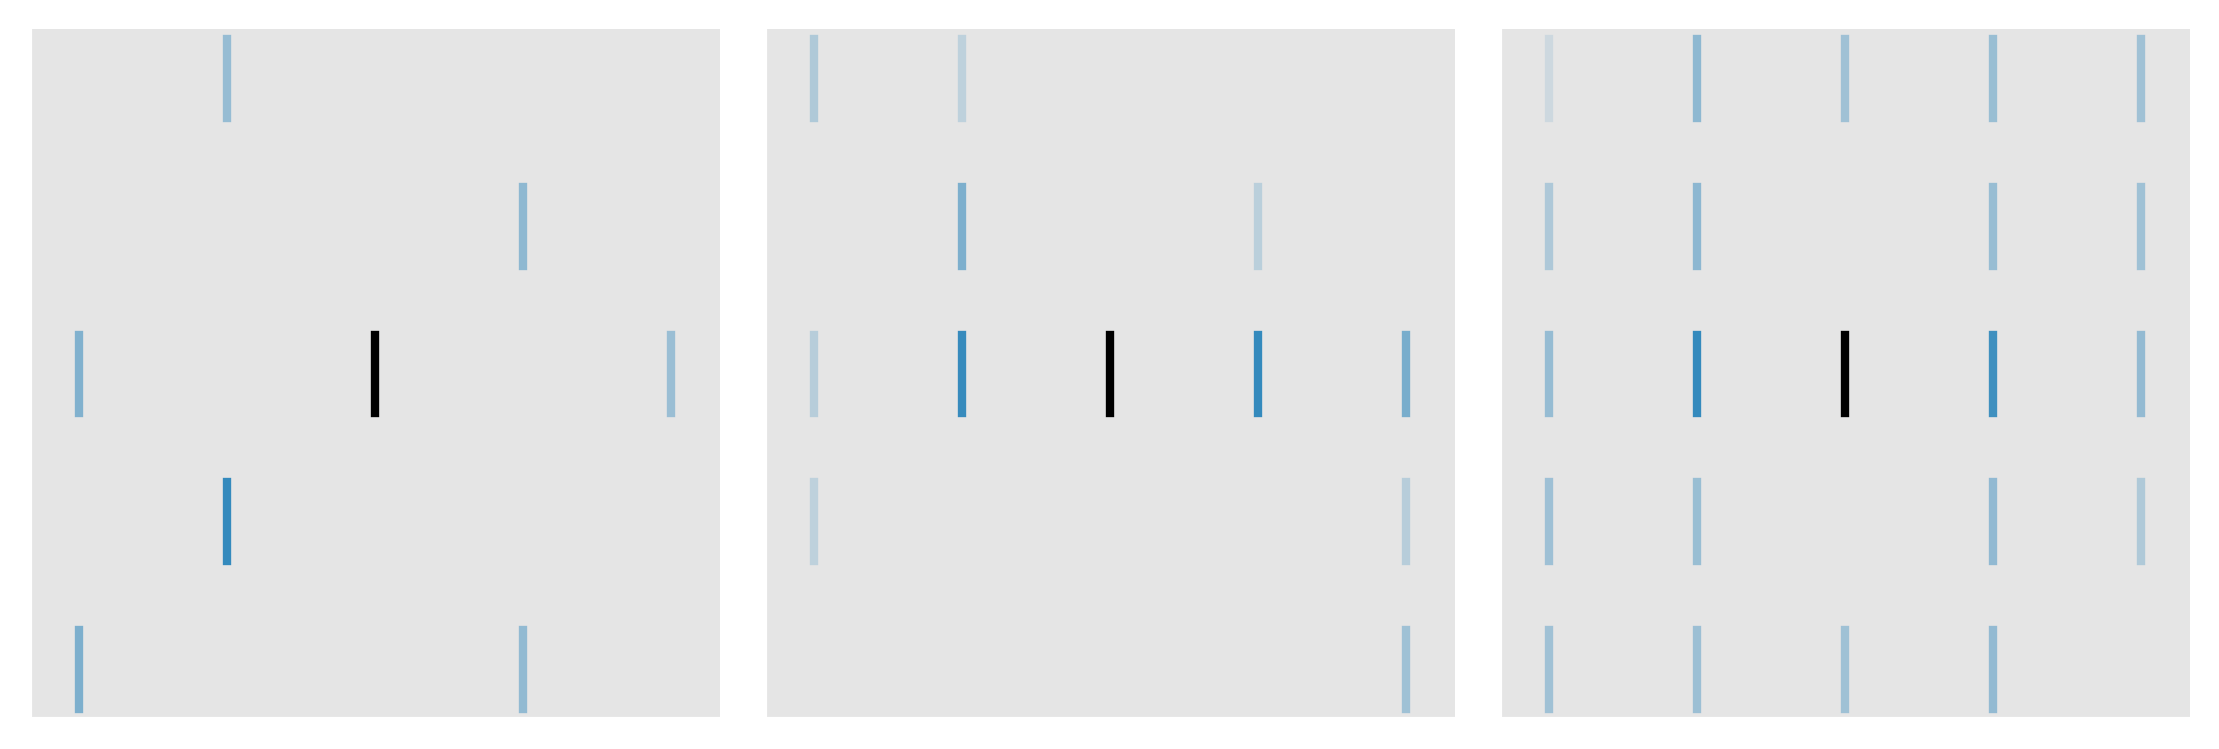

In [59]:
## setup figure
fig, axs = subplots(ncols=3, nrows=1, figsize=[figsize[0],figsize[1]/2])
ax = axs.ravel()
data = np.load('data/kapadiadata.npy')[()]
# do kapadia plot
def dokapplot(pos,subid):
    subplot(ax[subid])
    mods    = data[pos]
    alphas = abs(mods)/abs(mods).max()
    alphas[2,2]=10
    alphas = alphas-alphas.min()
    alphas[2,2]=0
    alphas = alphas/alphas.max()

    xys     = linspace(-6,6,len(mods))
    for j, x in enumerate(xys):
        for i, y in enumerate(xys[::-1]):
            f = 0
            if mods[i,j] > 0: c = c1
            if mods[i,j] < 0: c = c2
            if mods[i,j] == 0: c = 'k'

            alpha = alphas[i,j]


            if x == y == 0: 
                c = 'k'
                alpha = 1

            plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],color=c,linewidth=2,alpha = alpha)
    xlim(-7,7)
    ylim(-7,7)

dokapplot('top',0)
dokapplot('middle',1)
dokapplot('bottom',2)
## make all plots square
for i in range(0,len(ax)):
    forceAspect(ax[i],aspect=1)

## remove top bottom ticks
for i in range(0,len(ax)):
    subplot(ax[i])
    layout.cross_spines(ax=ax[i])
    xticks([])
    yticks([])
#     ax[i].xaxis.set_ticklabels([])
#     ax[i].yaxis.set_ticklabels([])
#     grid('off')
## prevent text overlap
fig.tight_layout()

## save figures 
savefig('finalFigs/resultsKapadiaInsets.pdf', bbox_inches='tight') # cannot save as eps because opacity is not compatible


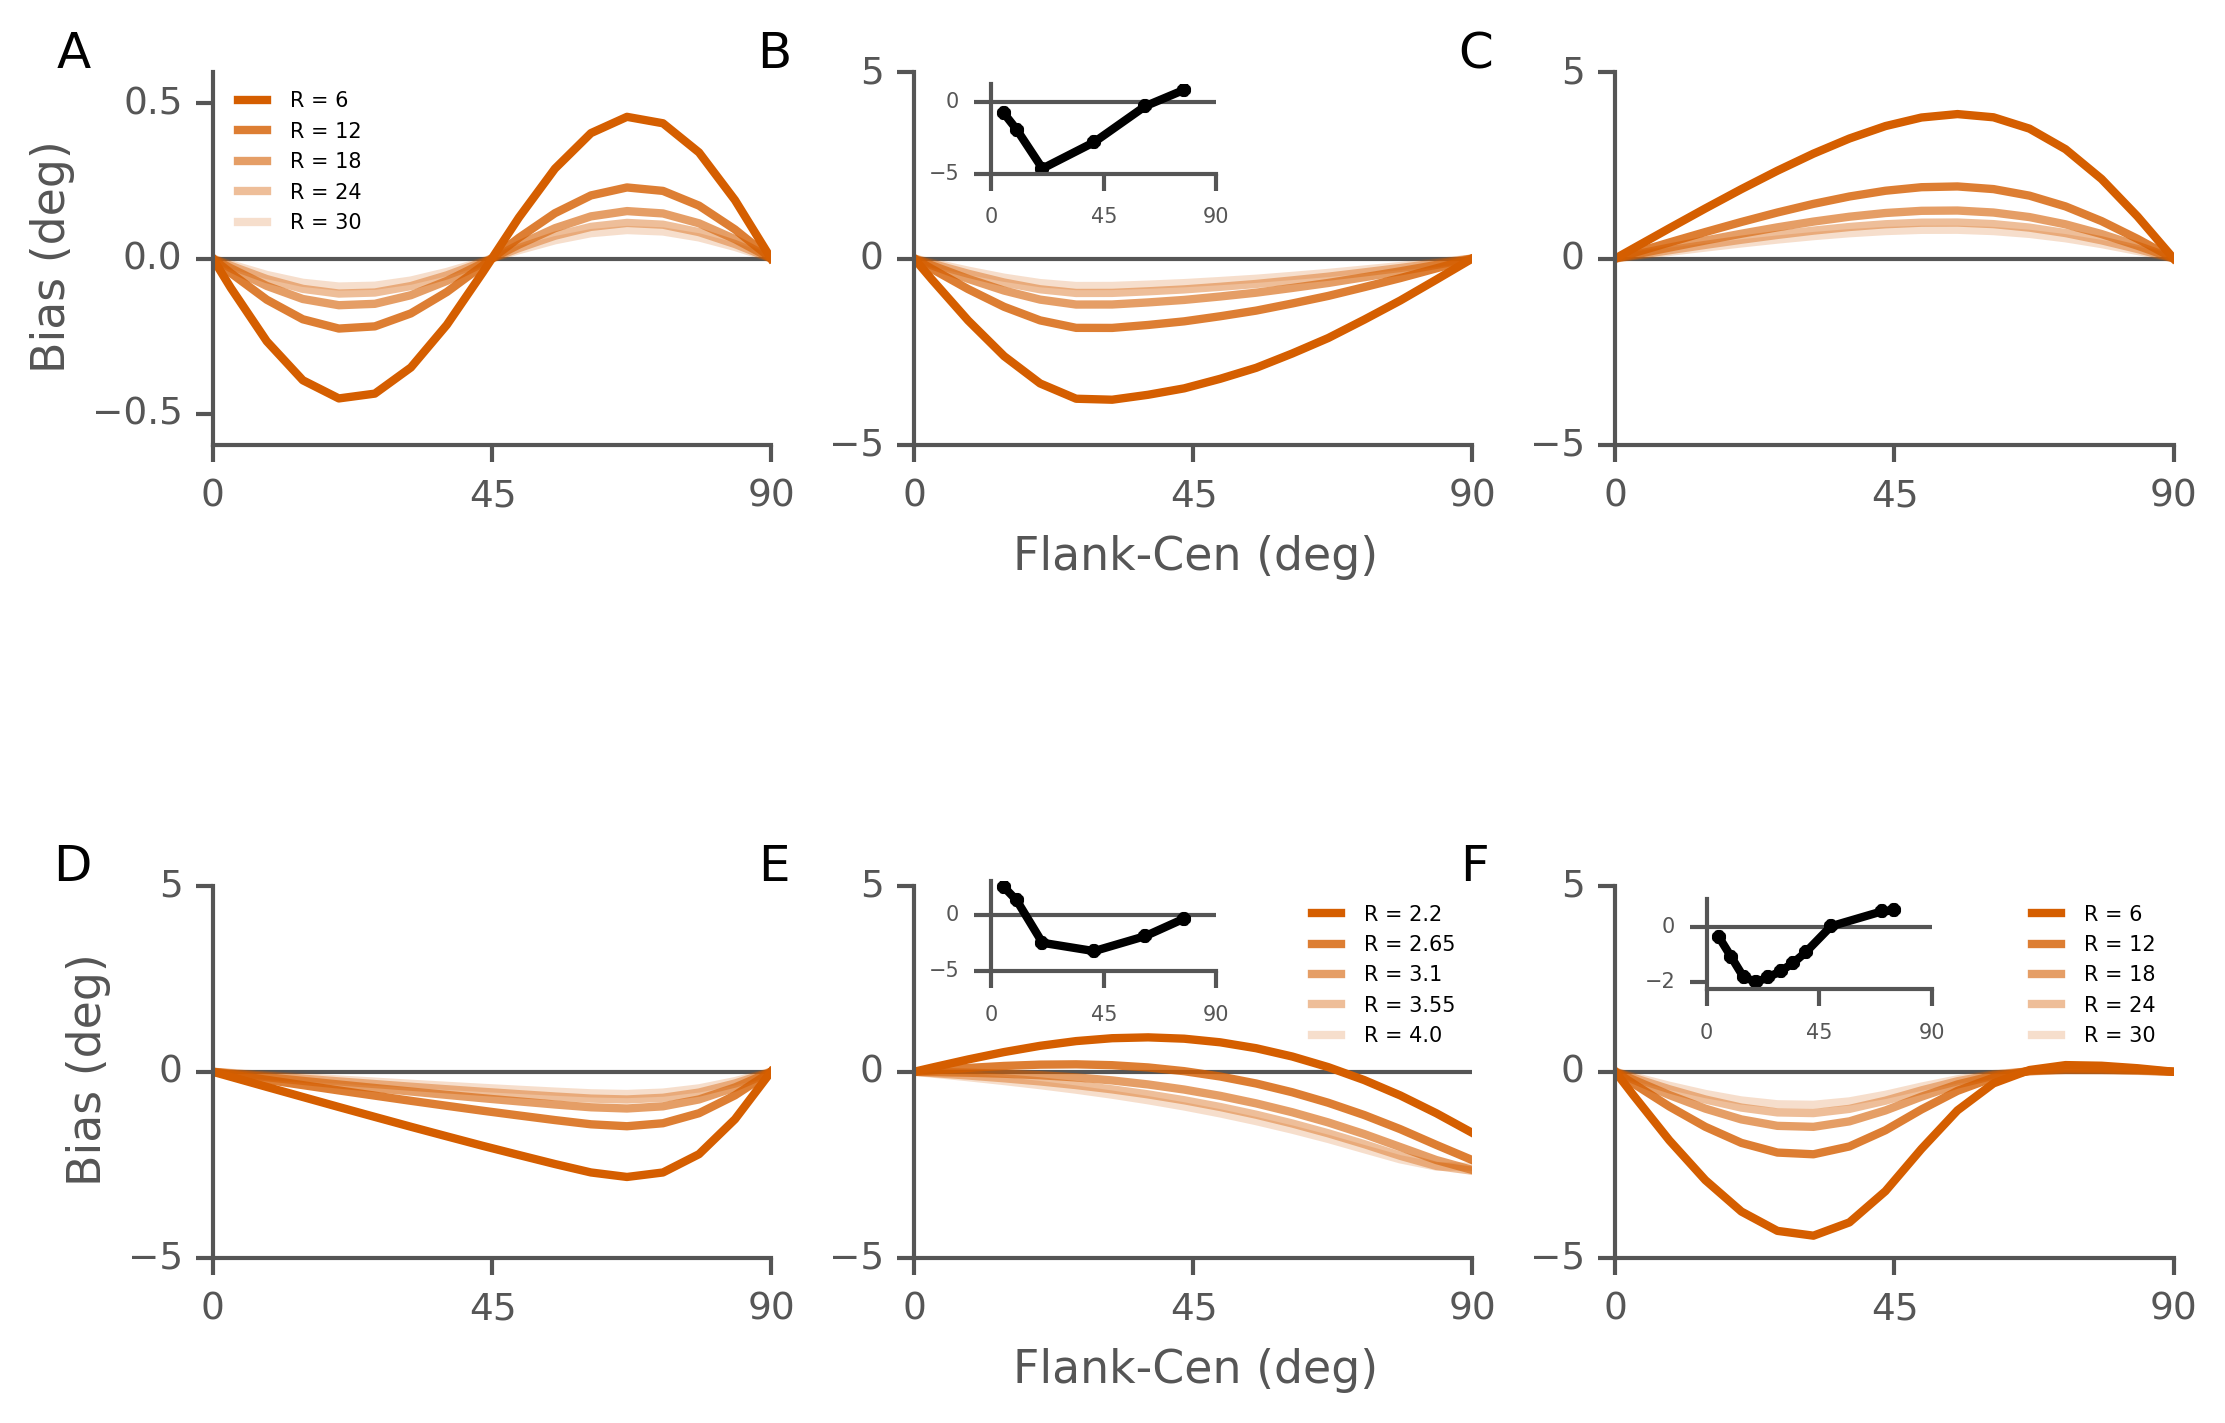

In [58]:
''' Results 2a: Tilt Illusion for two flankers, aligned or lateral
Shows the tilt illusion
'''
style.use('ggplotswk.mplstyle')
## load data
data = np.load('data/resultsSurroundTwoLateral.npy')[()]
estsLat = data['bias'] # biases
S = data['ang']*180/pi # surround orientations used
Rs  = data['R']   # distances of surround
nR = len(Rs)
data = np.load('data/resultsSurroundTwoLateralFixed.npy')[()]
estsLatFx = data['bias'] # biases
data = np.load('data/resultsSurroundTwoAligned.npy')[()]
estsAln = data['bias'] # biases
data = np.load('data/resultsSurroundTwoAlignedFixed.npy')[()]
estsAlnFx = data['bias'] # biases
data = np.load('data/resultsSurroundTwoKapadia.npy')[()]
estsKap = data['bias'] # biases
RsKap = data['R'] # distances
data = np.load('data/resultsSurroundFullWestheimerKc1.npy')[()]
estsWest = data['bias'] # biases
## setup figure
fig, axs = subplots(ncols=3, nrows=2, figsize=[figsize[0],figsize[1]])
ax = axs.ravel()

# plot x axis at 0.0
for i in range(len(ax)):
    subplot(ax[i])
    plot([0,90],[0,0],color='#555555',linewidth=1)

## Plot the biases
for i in range(nR):
    alpha= (Rs[-i-1])/max(Rs)
    subplot(ax[0])
    plot(S,estsLat[i,:],color=c1,alpha=alpha,label='R = '+str(int(Rs[i])))
    subplot(ax[1])    
    plot(S,estsLatFx[i,:],color=c1,alpha=alpha,label='R = '+str(int(Rs[i])))
    subplot(ax[2])    
    plot(S,estsAln[i,:],color=c1,alpha=alpha,label='R = '+str(int(Rs[i])))
    subplot(ax[3])   
    plot(S,estsAlnFx[i,:],color=c1,alpha=alpha,label='R = '+str(int(Rs[i])))
    subplot(ax[4])   
    plot(S,estsKap[i,:],color=c1,alpha=alpha,label='R = '+str((RsKap[i])))
    subplot(ax[5])   
    plot(S,estsWest[i,:],color=c1,alpha=alpha,label='R = '+str(int(Rs[i])))

    

    
# set legend
subplot(ax[0])
legend(loc=0,fontsize=5)
subplot(ax[4])
legend(fontsize=5)
subplot(ax[5])
legend(fontsize=5)

# set labels and axes properly
subplot(ax[0])  
ylabel('Bias (deg)')
subplot(ax[3])  
ylabel('Bias (deg)')
subplot(ax[1])   
xlabel('Flank-Cen (deg)')
subplot(ax[4])   
xlabel('Flank-Cen (deg)')
subplot(ax[0])
yticks(linspace(-0.5,0.5,3))
subplot(ax[1])
yticks(linspace(-5,5,3))
subplot(ax[2])
yticks(linspace(-5,5,3))
subplot(ax[3])
yticks(linspace(-5,5,3))
subplot(ax[4])
yticks(linspace(-5,5,3))
ylim(-5,5)
subplot(ax[5])
yticks(linspace(-5,5,3))

for i in range(len(ax)):
    subplot(ax[i])
    xticks(linspace(0,90,3))
    xlim(0,90)
    
## Add letter labels
for i in range(len(ax)):
    text(-0.25,1.05,letters[i],horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,size=12)
    
## make all plots proper rectangle
for i in range(len(ax)):
    forceAspect(ax[i],aspect=1.5)

## remove top bottom ticks
for i in range(len(ax)):
    layout.cross_spines(ax=ax[i])
    
## prevent text overlap
fig.tight_layout()

## do insets
# ## plot example real biases from kapadia
# approximately extracted data from fig 4C kapadia, averaged across 5 subjects
X = [5.07,10.21,20.51,41.18,61.61,76.97] # flanker angle (deg)
AlnY = [2.48,1.29,-2.48,-3.22,-1.89,-0.35]  # bias (deg) (negative is attractive) aligned case
LatY = [-0.8,-1.93,-4.64,-2.81,-0.31,0.81]  # bias (deg) (negative is attractive) lateral case

a = axes([.447, .773, .1, .05])
plot([0,90],[0,0],color= '#555555',linewidth=1)
plot(X,LatY,'k.-')
yticks([-5,0])
xticks([0,45,90])
ylim(-5,1.25)
layout.cross_spines(ax=a)
a.tick_params(axis='x', labelsize=5)
a.tick_params(axis='y', labelsize=5)

a = axes([.447, .33, .1, .05])
plot([0,90],[0,0],color= '#555555',linewidth=1)
plot(X,AlnY,'k.-')
yticks([-5,0])
xticks([0,45,90])
# ylim(-5,1.75)
layout.cross_spines(ax=a)
a.tick_params(axis='x', labelsize=5)
a.tick_params(axis='y', labelsize=5)

# plot example real bias from westheimer
X = array([4.97,9.84,14.78,19.93,24.72,29.80,34.67,39.60,49.73,70.15,75.08]) # flanker angle (deg)
Y = array([0.38,1.09,1.82,1.99,1.82,1.59,1.30,0.92,-0.02,-0.56,-0.59]) # average of 4 subjects, bias. postive is repulsive, so do minus
a = axes([.765, .32, .1, .05])
plot([0,90],[0,0],color= '#555555',linewidth=1)
plot(X,-Y,'k.-')
yticks([-2,0])
xticks([0,45,90])
ylim(-2.25,1)
layout.cross_spines(ax=a)
a.tick_params(axis='x', labelsize=5)
a.tick_params(axis='y', labelsize=5)


## save figures 
savefig('finalFigs/resultsIllusionsRaw.pdf', bbox_inches='tight')

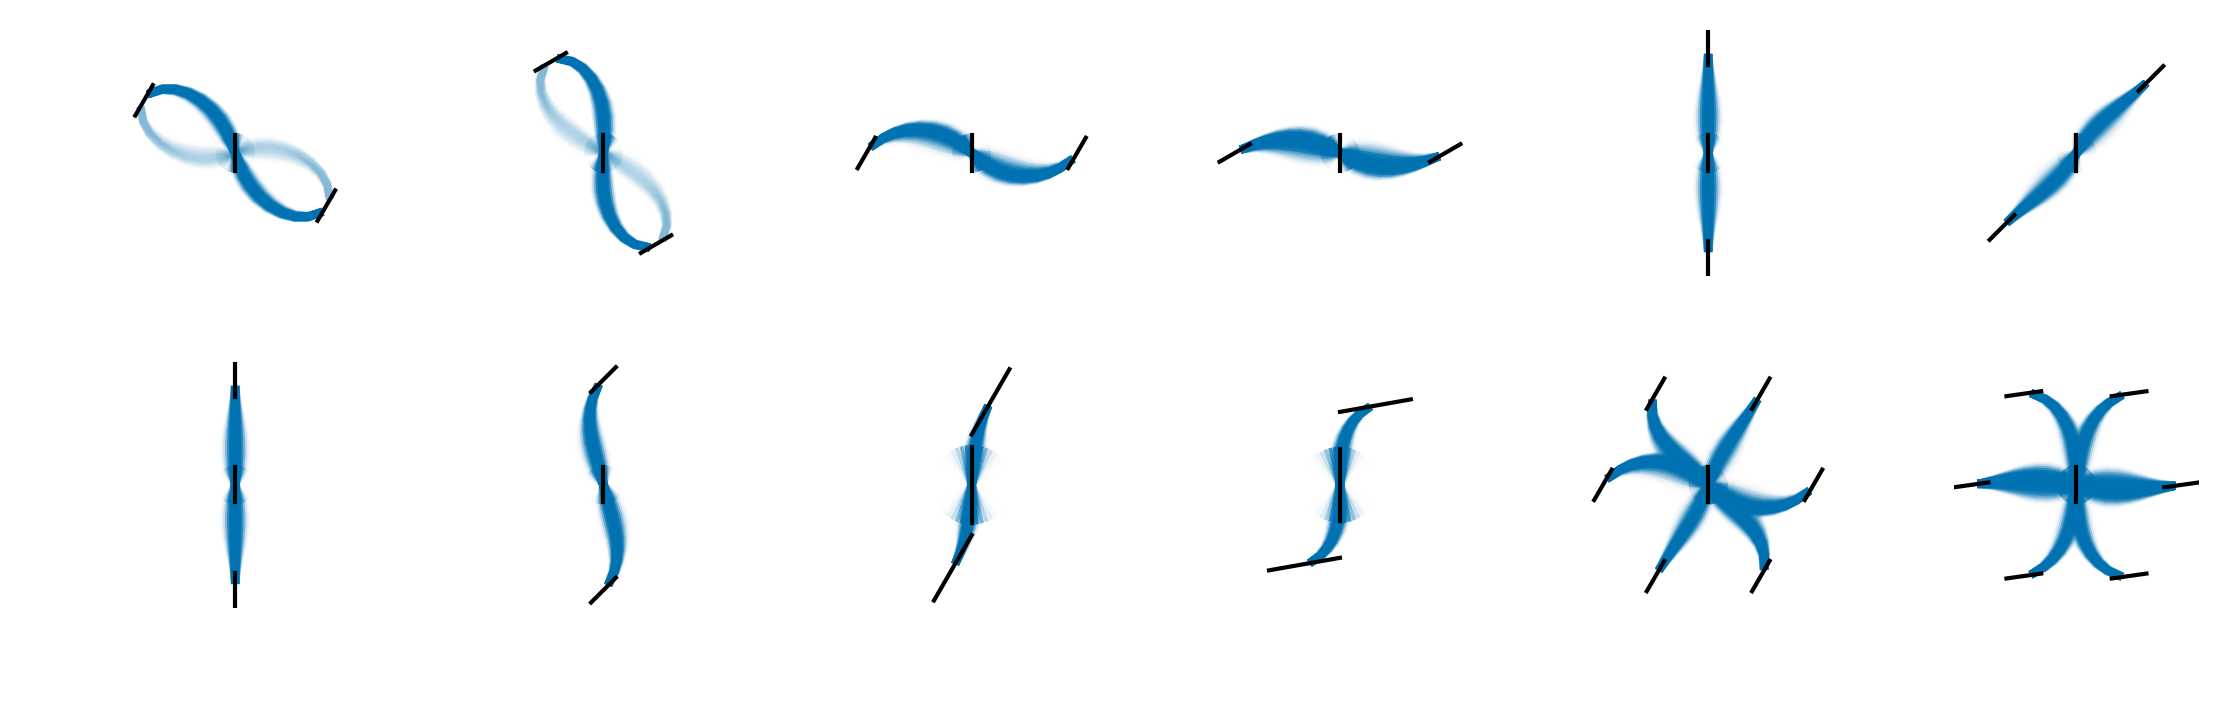

In [33]:
''' Results 2b: Tilt illusion explanations using curves '''
style.use('ggplotswk.mplstyle')



## setup figure
fig, axs = subplots(ncols=6, nrows=2, figsize=[figsize[0],figsize[1]])
ax = axs.ravel()

## basic variables
d = 0.4
r = 3
folder = 'data/illusioncurves/'

# variables modulation etc.
a = 0.5
E0 = 4
Kc = 1.5

## function for plotting a single scene of curves
def plotscene(filename,subid):
    '''
    filename - filename where data for curves is
    subid    - which subplot to put it in
    ax       - axes object
    r        - distance flanker
    phi      - positional angle flanker
    d        - halflength desired plotted bar
    '''
    # setup
    data = np.load(filename)[()]
    angs = data['angs'] # x-axis
    E = data['D']  # Curvature energy as a function of center
    r = data['rf']
    thc = data['c']  # center orientation
    Cdrive = exp(Kc*cos(2*(angs-thc))) # drive from center
    Smod = exp(-a*(E-E0))*exp(-a*(E-E0)) # surround modulation, sharon approx
    R = Smod*Cdrive
    f = data['f']  # flanker orientation
    phi = data['phi'] # flanker angular position    
    d  = data['d']
    X,Y = data['x,y'] # x and y coordinates of all the curves cooresponding to the energies
    xf = r*sin(phi)
    yf = r*cos(phi)
    
    # plot curves
    subplot(ax[subid])
    for i,c in enumerate(angs):
        alphar = (R[i]-min(R))/max(R-min(R))
        alpham = (Smod[i]-min(Smod))/max(Smod-min(Smod))
        plot(X[i,0:-1:100],Y[i,0:-1:100],'k',alpha=alphar,color=c2)
        plot(-X[i,0:-1:100],-Y[i,0:-1:100],'k',alpha=alphar,color=c2)
        plot([-sin(c)*d,sin(c)*d],[-cos(c)*d,cos(c)*d],'k',linewidth=1,alpha=alphar,color=c2)
    plot([-sin(thc)*d,sin(thc)*d],[-cos(thc)*d,cos(thc)*d],color='k',linewidth=1,alpha=1)
    plot([xf-sin(f)*d,xf+sin(f)*d],[yf-cos(f)*d,yf+cos(f)*d],color='k',linewidth=1,alpha=1)
    plot([-xf-sin(f)*d,-xf+sin(f)*d],[-yf-cos(f)*d,-yf+cos(f)*d],color='k',linewidth=1,alpha=1)
    xlim(-r-d,r+d)
    ylim(-r-d,r+d)

# do kapadia first    
filenames = ['Lateral30.npy','Lateral60.npy',
             'LateralFixed30.npy','LateralFixed60.npy',
              'Aligned0.npy','Aligned45.npy',
             'Aligned0.npy','AlignedFixed45.npy',
             'AlignedKapadia30.npy','AlignedKapadia80.npy']
for i in range(len(filenames)):
    filename = folder + filenames[i]
    plotscene(filename,i)
    axis('off')   
# then do westheimer
filenames = ['Westheimerf1th30.npy','Westheimerf2th30.npy','Westheimerf3th30.npy',
             'Westheimerf1th82.npy','Westheimerf2th82.npy','Westheimerf3th82.npy']
subids = [10,10,10,11,11,11]
for i in range(len(filenames)):
    filename = folder + filenames[i]
    plotscene(filename,subids[i])
    axis('off')   
    
## make all plots proper rectangle
for i in range(len(ax)):
    forceAspect(ax[i],aspect=1)
    
## prevent text overlap
fig.tight_layout(h_pad = -20)

## save figures 
savefig('finalFigs/resultsIllusionsCurves.pdf', bbox_inches='tight')

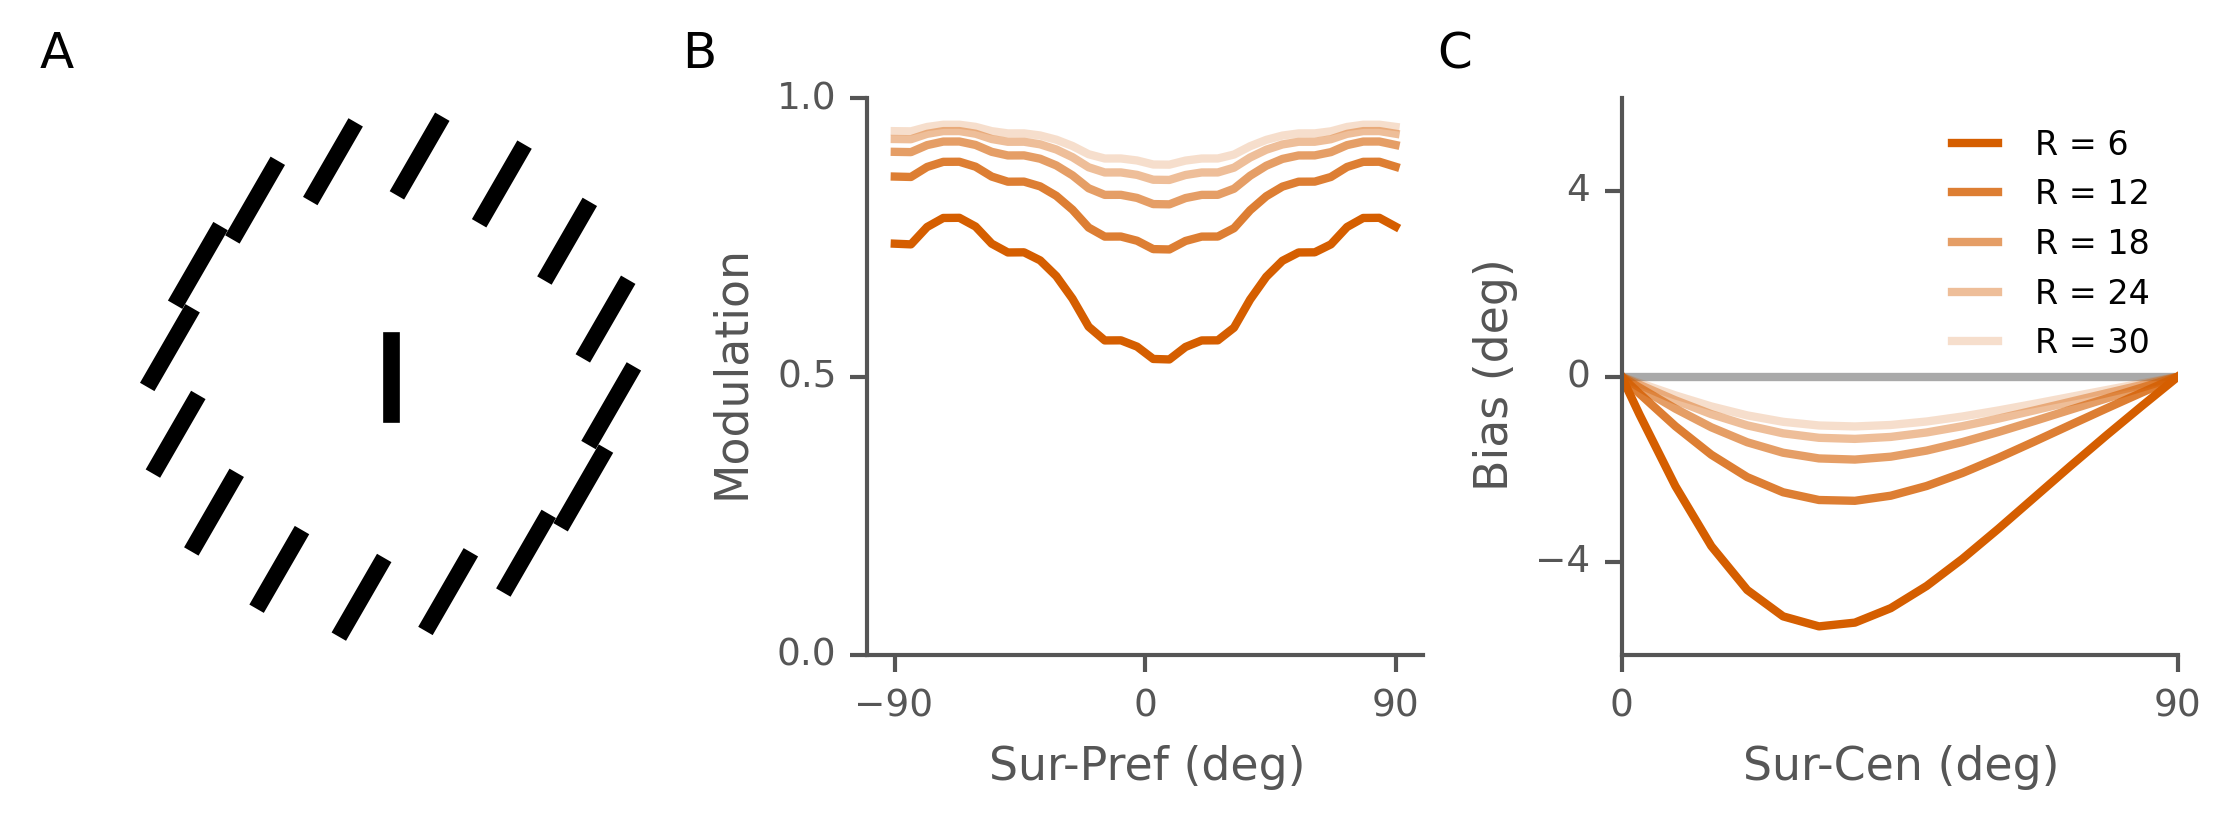

In [38]:
''' Results 3: Tilt Illusion for full surround
'''
style.use('ggplotswk.mplstyle')
## load data
data = np.load('data/resultsSurroundFull.npy')[()]
ests = data['bias'] # biases
S = data['ang']*180/pi # surround orientations used
Rs  = data['R']   # distances of surround
nR = len(Rs)
scene = data['scene'] # scene containing example surround to plot in A
R = data['Rpop'][:,16,:]  # responses 

## setup figure
fig, axs = subplots(ncols=3, nrows=1, figsize=[figsize[0],figsize[1]/2])
ax = axs.ravel()

## plot and save the scenes
subplot(ax[0])
scene.plotscene()
axis('off')


## Plot surround modulation
for i in range(nR):
    alpha= (Rs[-i-1])/max(Rs)
    subplot(ax[1])
    plot(S,R[i,:],color=c1,alpha=alpha,label='R = '+str(int(Rs[i])))


# plot axes
subplot(ax[2])
plot([-90,90],[0,0],color= '#555555',alpha=0.5)
# plot([0,0],[-3.7,3.7],color= '#555555',alpha=0.5)
    
## Plot the biases
for i in range(nR):
    alpha= (Rs[-i-1])/max(Rs)
    plot(S,ests[i,:],color=c1,alpha=alpha,label='R = '+str(int(Rs[i])))



# set legend
subplot(ax[2])
legend(loc=0,fontsize=8)

# set ticks and labels
subplot(ax[1])
ylabel('Modulation')
subplot(ax[1])
xlabel('Sur-Pref (deg)')
subplot(ax[2])  
ylabel('Bias (deg)')
subplot(ax[2])   
xlabel('Sur-Cen (deg)')
subplot(ax[1])
yticks(linspace(0,1,3))
subplot(ax[2])
yticks(linspace(-4,4,3))


# set x axes
for i in [1,2]:
    subplot(ax[i])
    xticks(linspace(-90,90,3))
subplot(ax[2])
xlim(0,90)
    
## Add letter labels
i=0
text(-0.1,1.08,letters[i],horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,size=12)
for i in range(1,3):
    text(-0.3,1.08,letters[i],horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,size=12)
    
## make all plots proper rectangle
for i in range(0,len(ax)):
    forceAspect(ax[i],aspect=1)

## remove top bottom ticks
for i in range(len(ax)):
    layout.cross_spines(ax=ax[i])
    
## prevent text overlap
fig.tight_layout()

# # ## plot example real bias
# a = axes([.75, .3, .10, .15])
# X = array([4.97,9.84,14.78,19.93,24.72,29.80,34.67,39.60,49.73,70.15,75.08]) # flanker angle (deg)
# Y = array([0.38,1.09,1.82,1.99,1.82,1.59,1.30,0.92,-0.02,-0.56,-0.59]) # average of 4 subjects, bias. postive is repulsive, so do minus
# plot([-90,90],[0,0],color= '#555555')
# plot([0,0],[-2,2],color= '#555555')
# plot(X,-Y,'k.-')
# plot([X[0],-X[0]],[-Y[0],Y[0]],'k.-')
# plot(-X,Y,'k.-')
# yticks([-2,0])
# xticks([0,90])
# ylim(-2.1,2.1)
# axis('off')
# layout.cross_spines(ax=a)
# a.tick_params(axis='x', labelsize=5)
# a.tick_params(axis='y', labelsize=5)
# text(0.55,1,'2',horizontalalignment='center',verticalalignment='center',transform=a.transAxes,size=5,color= '#555555')
# text(0.425,0,'-2',horizontalalignment='center',verticalalignment='center',transform=a.transAxes,size=5,color= '#555555')

## save figures 
savefig('finalFigs/resultsSurround.pdf', bbox_inches='tight')

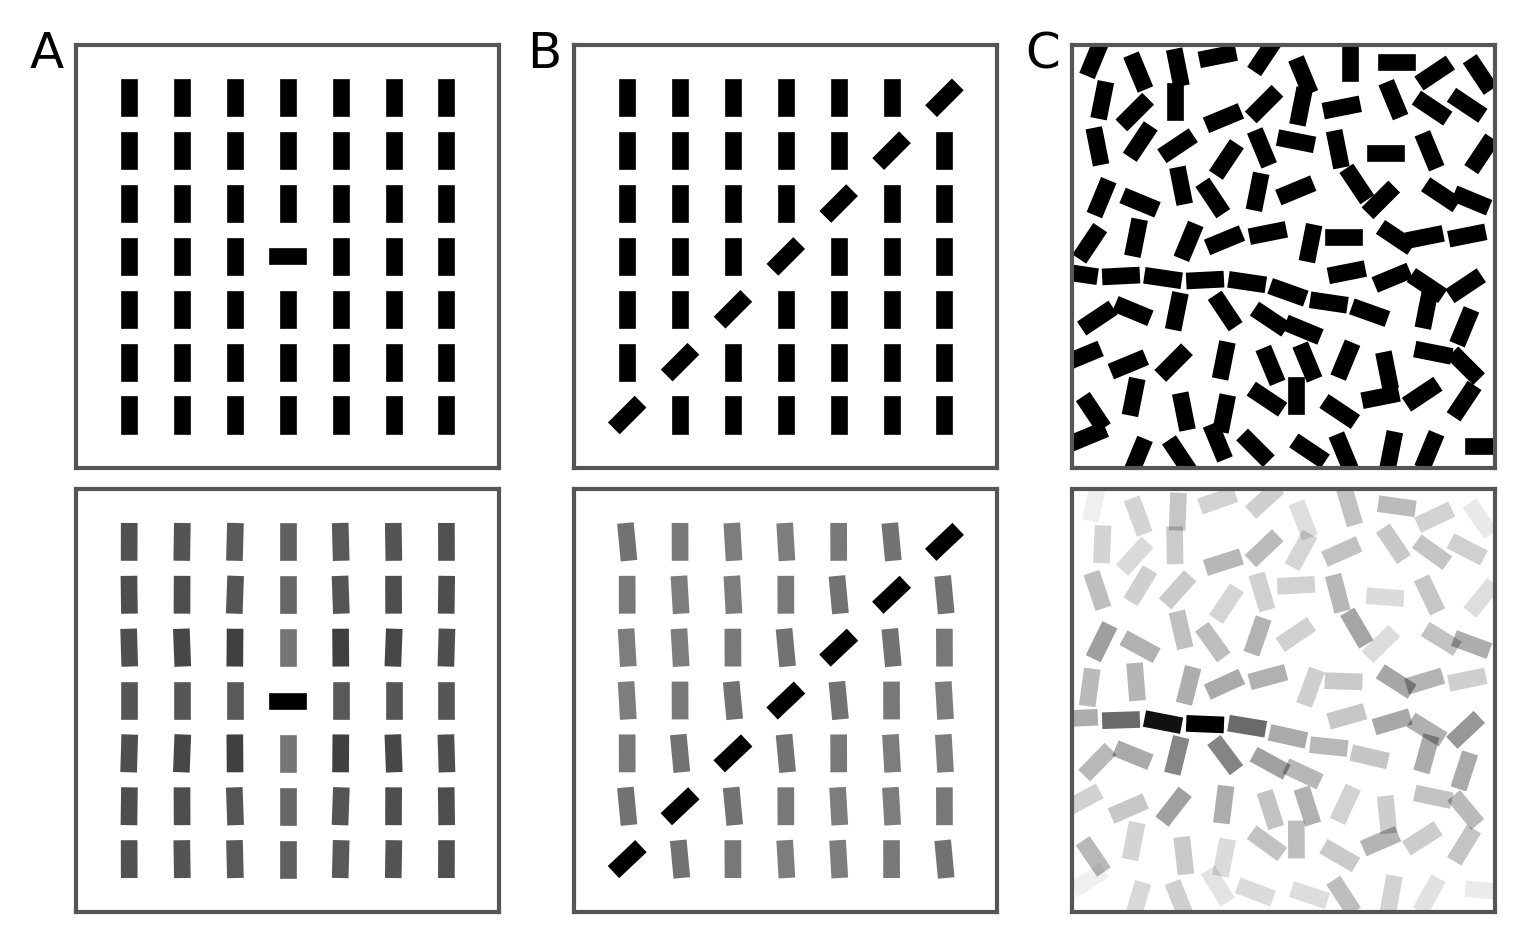

In [46]:
''' Results 4: Saliency
Show saliency results for different situations
'''
style.use('ggplotswk.mplstyle')
## setup figure
fig, axs = subplots(ncols=3, nrows=2, figsize=[figsize[0]*2/3,figsize[1]/1.5])
ax = axs.ravel()

## load data
data = np.load('data/resultsSalience.npy')[()]
scene1 = data['sceneSingle']
scene2 = data['sceneContour']
scene3 = scene = load('data/noisyscene.npy')[()]

## single salient target
scene = scene1
# plot normal scene
subplot(ax[0])
scene.plotscene()
# find max based saliencies and plot
subplot(ax[3])
scene.saliency('max')
scene.plotscene(oriens = scene.est,alphas=scene.sal,colors = 'off')

## contour saliency
scene = scene2
# plot normal scene
subplot(ax[1])
scene.plotscene()
# find max based saliencies and plot
subplot(ax[4])
scene.saliency('max')
scene.plotscene(oriens = scene.est,alphas=scene.sal,colors = 'off')

## contour in noise saliency
scene = scene3
# plot normal scene
subplot(ax[2])
scene.plotscene(length=0.75)
# find max based saliencies and plot
subplot(ax[5])
scene.saliency('max')
scene.plotscene(oriens = scene.est,length=0.75,alphas=scene.sal,colors = 'off')

## set ticks and labels
for i in range(len(ax)):
    subplot(ax[i])
    xticks([])
    yticks([])


## Add letter labels
for i in range(3):
    subplot(ax[i])
    text(-0.07,0.98,letters[i],horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,size=12)
    
## make all plots proper rectangle
for i in range(0,len(ax)):
    forceAspect(ax[i],aspect=1)

# ## remove top bottom ticks
# for i in range(len(ax)):
#     layout.cross_spines(ax=ax[i])
    
## prevent text overlap
fig.tight_layout(h_pad=-4,w_pad=2)

## save figures 
savefig('finalFigs/resultsSalienceRaw.pdf', bbox_inches='tight')

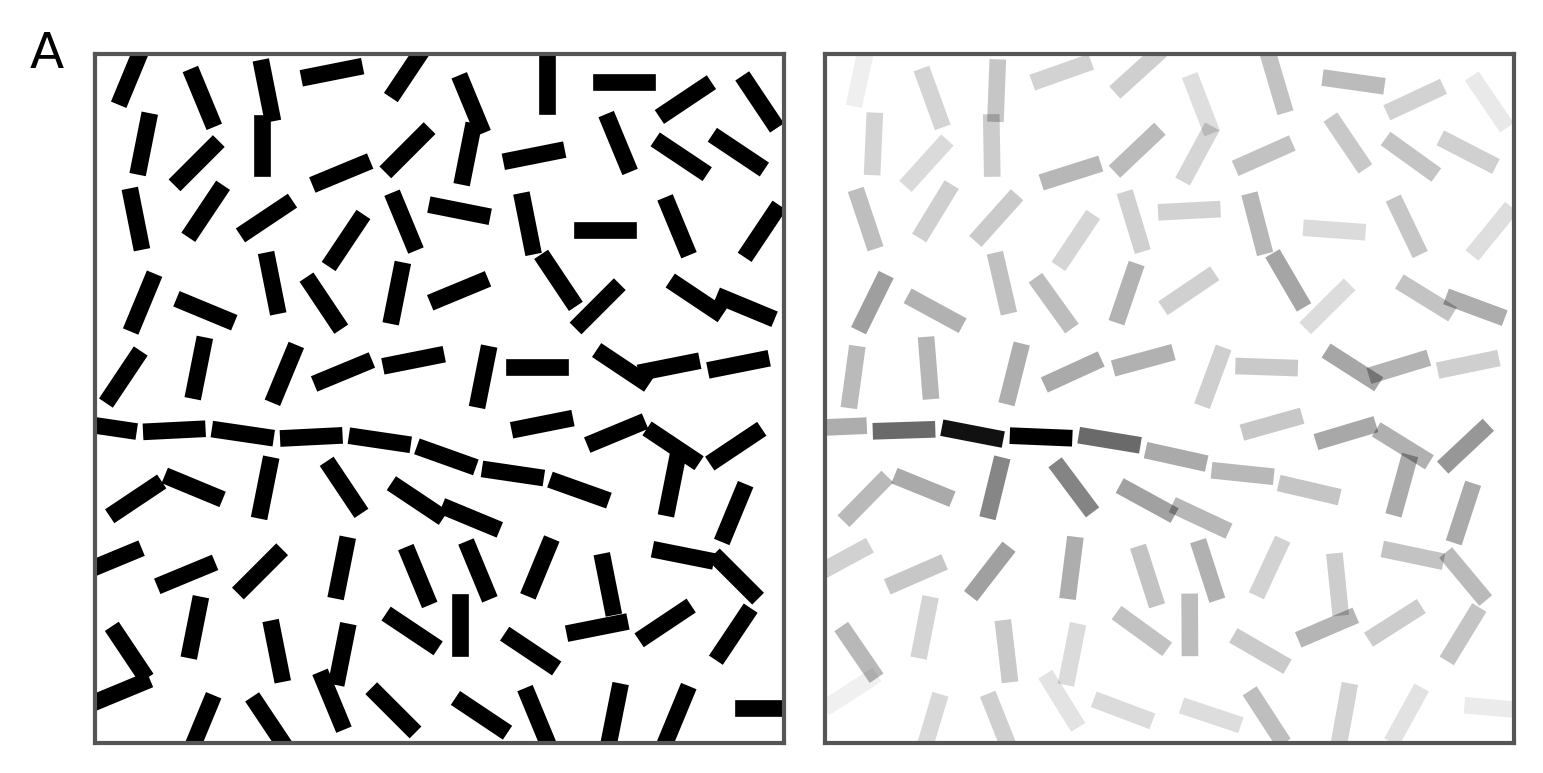

In [47]:
''' Results 5: contour extraction from noisy scenes
Plotting a bigger noisy scene.
Will be done in two figures, to be put together in inkscape
'''
''' First figure, saliency example '''
style.use('ggplotswk.mplstyle')
## setup figure
fig, axs = subplots(ncols=2, nrows=1, figsize=[figsize[0]*2/3,figsize[1]/2])
ax = axs.ravel()
## single salient target
scene = load('data/noisyscene.npy')[()]
# plot normal scene
subplot(ax[0])
scene.plotscene()
# find max based saliencies and plot
subplot(ax[1])
scene.saliency('max')
scene.plotscene(oriens = scene.est,alphas=scene.sal,colors = 'off')

## set ticks and labels
for i in range(len(ax)):
    subplot(ax[i])
    xticks([])
    yticks([])

## Add letter labels
for i in range(1):
    subplot(ax[i])
    text(-0.07,1,letters[i],horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,size=12)
    
## make all plots proper rectangle
for i in range(0,len(ax)):
    forceAspect(ax[i],aspect=1)

# ## remove top bottom ticks
# for i in range(len(ax)):
#     layout.cross_spines(ax=ax[i])
    
## prevent text overlap
fig.tight_layout()

## save figures 
savefig('finalFigs/resultsNoisySceneRAW.pdf', bbox_inches='tight')



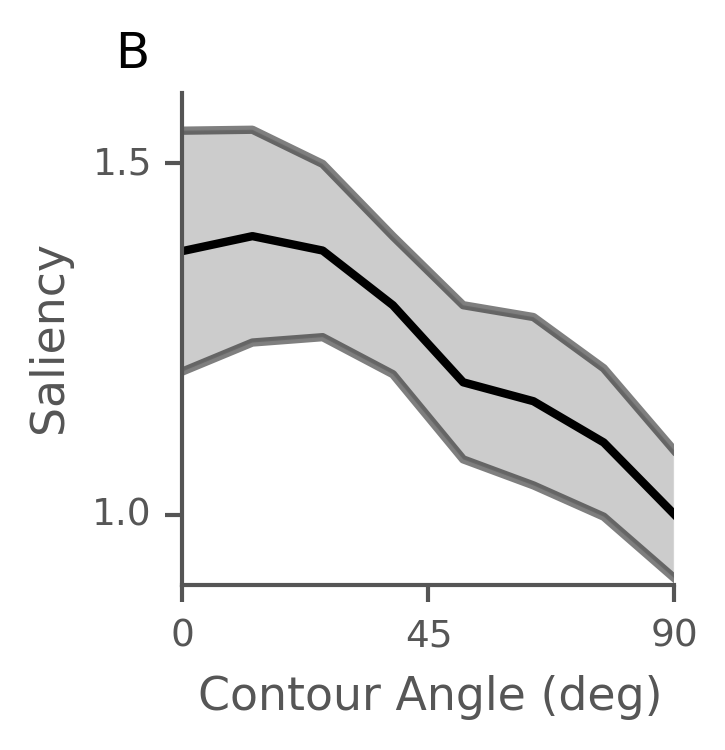

In [48]:
''' Second figure, saliency over many iterations '''
style.use('ggplotswk.mplstyle')
## load data
sal = np.load('data/sal.npy')
sal_std = np.load('data/sal_std.npy')
As = linspace(0,pi/2,len(sal))*180/pi

## setup figure
fig, axs = subplots(ncols=1, nrows=1, figsize=[figsize[0]/3,figsize[1]/2])
ax = axs

## plot with STD
y1 = sal+sal_std/2
y2 = sal-sal_std/2
x = As
plot(As,sal,color='k')
plot(As,y1,alpha=0.5,color='k')
plot(As,y2,alpha=0.5,color='k')
ax.fill_between(x, y1, y2,  facecolor='k', alpha = 0.2,interpolate=True)
# ax.fill_between(x, y1, y2, where=y2<=y1, facecolor='red', interpolate=True)

## set ticks and labels
xlabel('Contour Angle (deg)')
ylabel('Saliency')
yticks(linspace(1,1.5,2))
xticks(arange(0,91,45))
savefig('results_contoursal.eps')

## Add letter labels
i=0
text(-0.10,1.08,letters[1],horizontalalignment='center',verticalalignment='center',transform=ax.transAxes,size=12)

## make all plots proper rectangle    
forceAspect(ax,aspect=1)

## remove top bottom ticks
layout.cross_spines(ax=ax)
    
## prevent text overlap
fig.tight_layout()

## save figures 
savefig('finalFigs/resultsSaliencyContoursRAW.pdf', bbox_inches='tight')

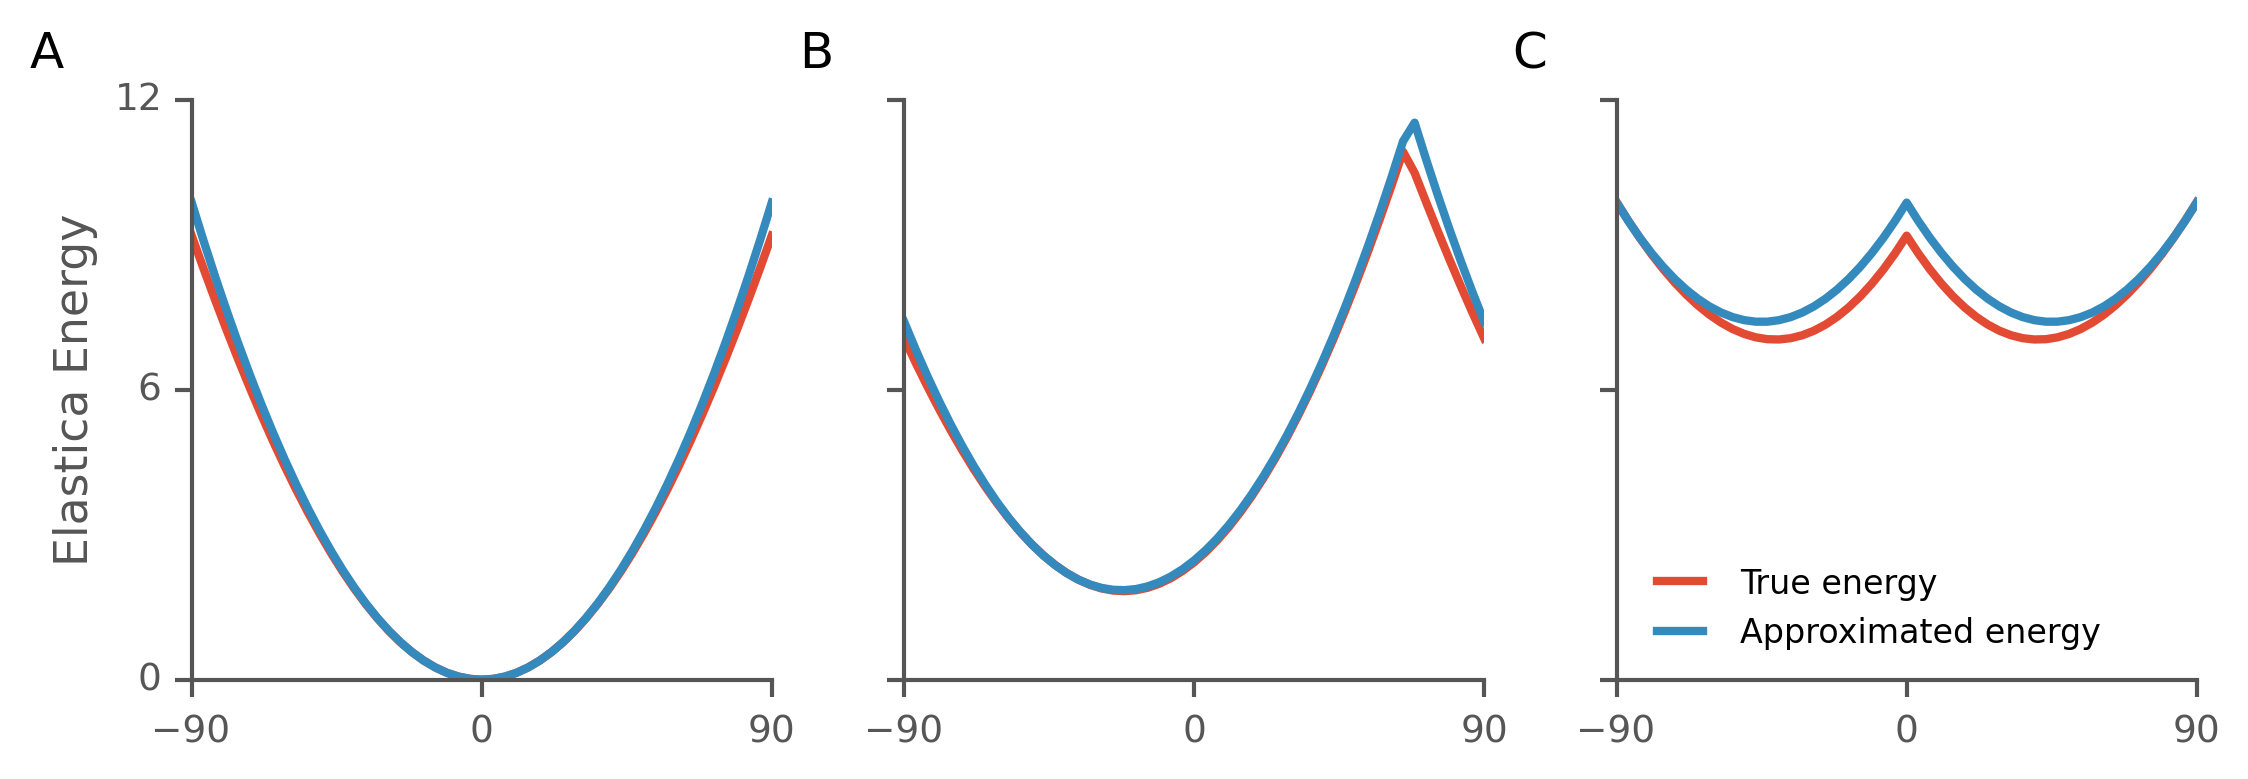

In [57]:
'''
Showing how close we are to the full elastica
'''
style.use('ggplotswk.mplstyle')



## setup figure
fig, axs = subplots(ncols=3, nrows=1, figsize=[figsize[0],figsize[1]])
ax = axs.ravel()

## plot the biases
data = np.load('data/methodsFullVsSharonPsi2is180.0.npy')[()]
subplot(ax[0])
c= data['c'] 
E= data['full'] 
d= data['sharon'] 
psi2 = data['end'] 
plot(c*180/pi,E.min(1),label='full')
plot(c*180/pi,d.min(1),label='sharon')

data = np.load('data/methodsFullVsSharonPsi2is-135.0.npy')[()]
subplot(ax[1])
c= data['c'] 
E= data['full'] 
d= data['sharon'] 
psi2 = data['end'] 
plot(c*180/pi,E.min(1),label='full')
plot(c*180/pi,d.min(1),label='sharon')

data = np.load('data/methodsFullVsSharonPsi2is-90.0.npy')[()]
subplot(ax[2])
c= data['c'] 
E= data['full'] 
d= data['sharon'] 
psi2 = data['end'] 
plot(c*180/pi,E.min(1),label='True energy')
plot(c*180/pi,d.min(1),label='Approximated energy')

# ## energy across end orientations
# data = np.load('data/methodsEnergyError.npy')[()]
# subplot(ax[4])
# psi2s = data['psi2']
# dE = data['dE']
# plot(psi2s*180/pi,dE,'k')


# set ticks and labels
for i in range(len(ax)):
    subplot(ax[i])
    xticks(linspace(-90,90,3))
    xlim(-90,90)

subplot(ax[0])
yticks(linspace(0,12,3))
ylabel('Elastica Energy')
for i in range(1,3):
    subplot(ax[i])
    yticks(linspace(0,12,3),['']*3)
legend(loc=0,fontsize=8)
    
# subplot(ax[4])
# yticks(linspace(0,0.3,2))
# xlabel('Centre orientation (deg)')
# ylabel('Mean absolute error (deg)')

# Add letter labels
i=0
subplot(ax[i])
text(-0.25,1.08,letters[i],horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,size=12)
for i in range(1,len(ax)):
    subplot(ax[i])
    text(-0.15,1.08,letters[i],horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,size=12)
    
## make all plots proper rectangle
for i in range(0,len(ax)):
    forceAspect(ax[i],aspect=1)

## remove top bottom ticks
for i in range(len(ax)):
    layout.cross_spines(ax=ax[i])
    
# ## prevent text overlap
fig.tight_layout(w_pad=2)

# ## save figures 

savefig('finalFigs/methodsElasticaenergyRaw.eps', bbox_inches='tight')

10 [ -7.32806751e+00  -5.77434027e+00  -3.66913363e+00  -1.67002037e+00
  -2.18786738e-01   5.38206072e-01   7.76404369e-01   6.60213170e-01
   3.70305745e-01  -1.31135839e-14]
[ -4.04748607e+00  -3.20813999e+00  -2.07244248e+00  -1.03765795e+00
  -3.11793290e-01   4.66576973e-02   1.78653133e-01   1.61794457e-01
   9.46232162e-02  -5.40998734e-15]
[ -2.99507067e+00  -2.38208731e+00  -1.54135925e+00  -8.15217253e-01
  -3.41337454e-01  -1.29307054e-01  -3.68915122e-02  -1.75549135e-02
  -4.02388281e-03  -2.63849020e-15]


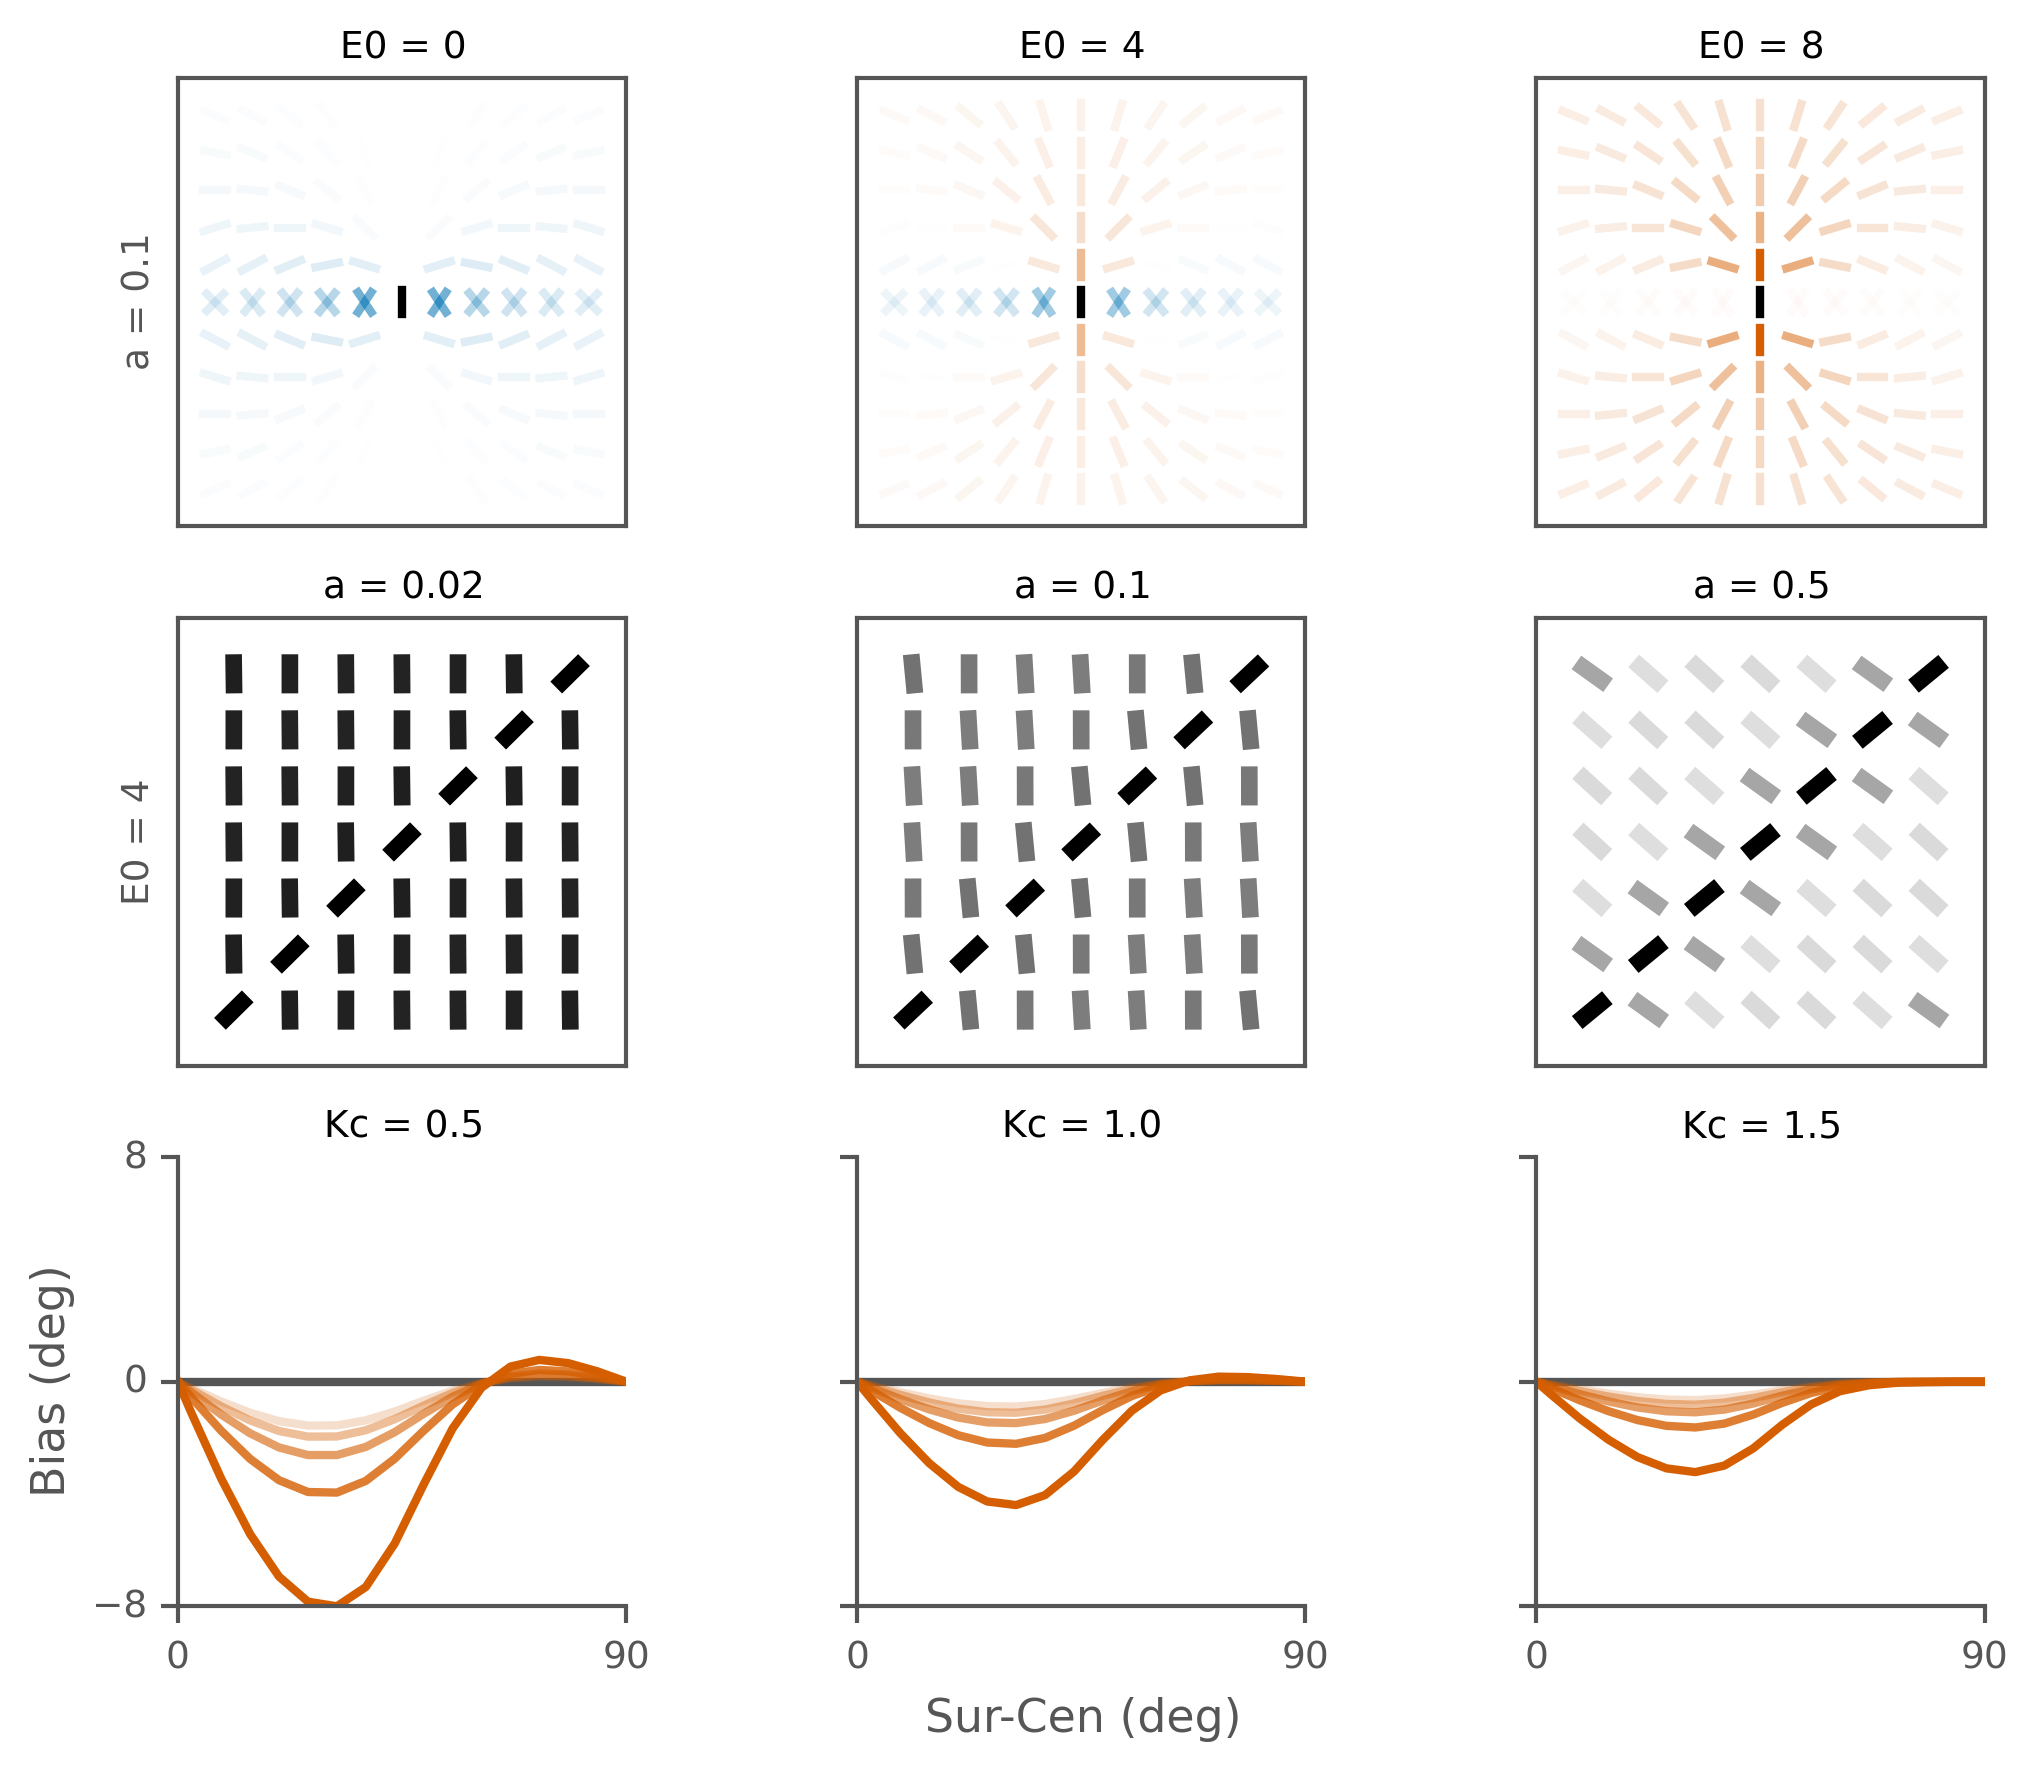

In [50]:
'''
Showing effect of B0 parameter
'''
style.use('ggplotswk.mplstyle')

## setup figure
fig, axs = subplots(ncols=3, nrows=3, figsize=[figsize[0],figsize[1]])
ax = axs.ravel()

# plotting function
# this plots three images from a folder in subid
def plotE0(folder,subid):
    ## plot association field
    ## load data
    data = np.load('data/'+folder+'/resultsOneFlanker.npy')[()] 
    mods = data['mods'] # modulation values
    xys = data['xys']   # x and y  values
    ang = data['ang'] # ang 
    style.use('ggplot')

    #### plot the highest influences, inhibitory or excitatory
    l=0.8
    for j, x in enumerate(xys/2):
        print '\r',
        print j,
        for i, y in enumerate(xys/2):
            if x != 0 or y != 0:
                subplot(ax[subid])
                k = argmax(mods[i,j,:])
                f = ang[k]
                if mods[i,j,k] < 0:
                    alpha = abs(mods[i,j,k])
                    c = c2
                else:
                    alpha = mods[i,j,k]
                    c = c1
                plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],color=c,linewidth=2,alpha = alpha)
                if round(y,10) == 0:
                    f = -f
                    plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],color=c,linewidth=2,alpha = alpha)
            else:
                f=0
                subplot(ax[subid])
                plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],'k',linewidth = 2)

# plotting function
# this plots three images from a folder in subid
def plota(folder,subid):    
    #### plot simple contour
    ## load data
    data = np.load('data/'+folder+'/resultsSalience.npy')[()]
    scene = data['sceneContour']

    # plot normal scene
    subplot(ax[subid])
    scene.saliency('max')
    scene.plotscene(oriens = scene.est,alphas=scene.sal,colors = 'off')
    

# Westheimer illusion plotting function
def plotW(filename,subid): 
    #### plot simple contour
    ## load data
    data = np.load('data/'+filename)[()]
    S  = data['ang']*180/pi  # angles
    ests = data['bias'] # biases
    Rs   = data['R']    # flanker distances
    nR = len(Rs)
    
    
    
    # plot normal scene
    subplot(ax[subid])
    plot([0,90],[0,0],color='#555555')
    ## Plot the biases
    for i in range(nR):
        alpha= (Rs[-i-1])/max(Rs)
        plot(S,ests[i,:],color=c1,alpha=alpha,label='r = '+str(int(Rs[i])))
    print ests[0,len(S)-10:len(S)]
        
    
   

#### Plot three B0 values
with plt.style.context(('dark_background')):
    plotE0('E0_0',0)
    plotE0('E0_4',1)
    plotE0('E0_8',2)
    plota('a_002',3)
    plota('a_01',4)
    plota('a_05',5)
    plotW('resultsSurroundFullWestheimerKc05.npy',6)
    plotW('resultsSurroundFullWestheimerKc1.npy',7)
    plotW('resultsSurroundFullWestheimerKc15.npy',8)

# set ticks and labels
titles = ['E0 = 0','E0 = 4','E0 = 8','a = 0.02','a = 0.1','a = 0.5','Kc = 0.5','Kc = 1.0','Kc = 1.5']
for i in range(len(ax)):
    subplot(ax[i])
    xticks([])
    yticks([])
    title(titles[i],fontsize=9)
subplot(ax[0])
ylabel('a = 0.1',fontsize=9)
subplot(ax[3])
ylabel('E0 = 4',fontsize=9)
# subplot(ax[6])
# ylabel('E0 = 4,a = 0.1',fontsize=9)

for i in range(6):
    subplot(ax[i])
    xticks([])
    yticks([])
for i in range(7,9):
    subplot(ax[i])
    xticks(linspace(0,90,2))
    xlim(0,90)
    yticks(linspace(-8,8,3),['']*2)
    ylim(-8,8)
subplot(ax[6])
yticks(linspace(-8,8,3))
xticks(linspace(0,90,2))
xlim(0,90)
ylim(-8,8)
ylabel('Bias (deg)')
subplot(ax[7])
xlabel('Sur-Cen (deg)')
# Add letter labels
# for k,i in enumerate([0,3,6]):
#     subplot(ax[i])
#     text(-0.1,1.03,letters[k],horizontalalignment='center',verticalalignment='center',transform=ax[i].transAxes,size=12)
    
## make all plots proper rectangle
for i in range(0,6):
    forceAspect(ax[i],aspect=1)
for i in range(6,9):
    forceAspect(ax[i],aspect=1)
    
# remove top bottom ticks
for i in range(6,9):
    layout.cross_spines(ax=ax[i])
    
# ## prevent text overlap
fig.tight_layout()

## save figures 
savefig('finalFigs/methodsChangeInB0anda.pdf', bbox_inches='tight')

10


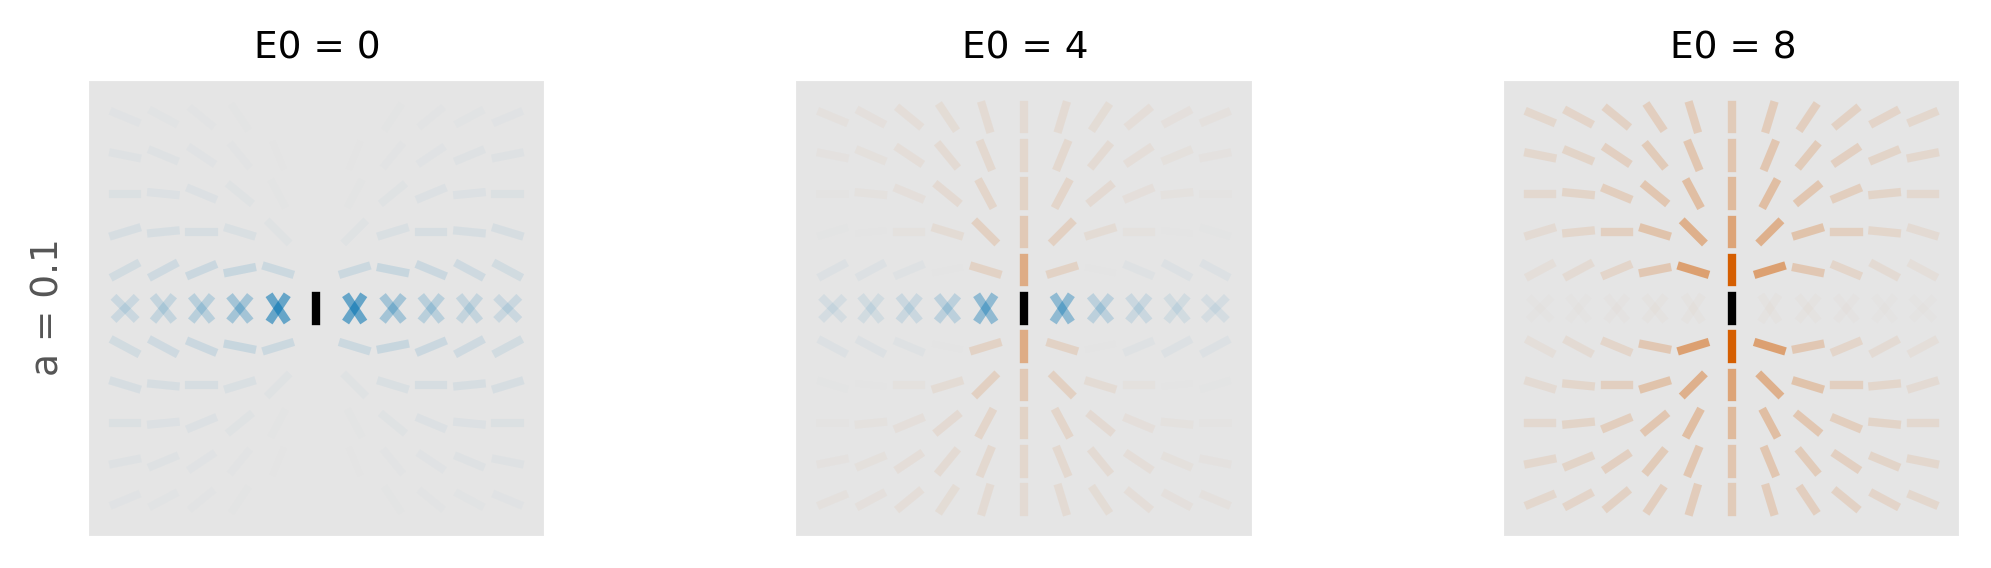

In [52]:
'''
Showing effect of B0 parameter
'''
style.use('ggplot')

## setup figure
fig, axs = subplots(ncols=3, nrows=1, figsize=[figsize[0],figsize[1]/3])
ax = axs.ravel()

# plotting function
# this plots three images from a folder in subid
def plotE0(folder,subid):
    ## plot association field
    ## load data
    data = np.load('data/'+folder+'/resultsOneFlanker.npy')[()] 
    mods = data['mods'] # modulation values
    xys = data['xys']   # x and y  values
    ang = data['ang'] # ang 
    style.use('ggplot')

    #### plot the highest influences, inhibitory or excitatory
    l=0.8
    for j, x in enumerate(xys/2):
        print '\r',
        print j,
        for i, y in enumerate(xys/2):
            if x != 0 or y != 0:
                subplot(ax[subid])
                k = argmax(mods[i,j,:])
                f = ang[k]
                if mods[i,j,k] < 0:
                    alpha = abs(mods[i,j,k])
                    c = c2
                else:
                    alpha = mods[i,j,k]
                    c = c1
                plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],color=c,linewidth=2,alpha = alpha)
                if round(y,10) == 0:
                    f = -f
                    plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],color=c,linewidth=2,alpha = alpha)
            else:
                f=0
                subplot(ax[subid])
                plot([x-sin(f)*l,x+sin(f)*l],[y-cos(f)*l,y+cos(f)*l],'k',linewidth = 2)

# plotting function
# this plots three images from a folder in subid
def plota(folder,subid):    
    #### plot simple contour
    ## load data
    data = np.load('data/'+folder+'/resultsSalience.npy')[()]
    scene = data['sceneContour']

    # plot normal scene
    subplot(ax[subid])
    scene.saliency('max')
    scene.plotscene(oriens = scene.est,alphas=scene.sal,colors = 'off')
    

# Westheimer illusion plotting function
def plotW(filename,subid): 
    #### plot simple contour
    ## load data
    data = np.load('data/'+filename)[()]
    S  = data['ang']*180/pi  # angles
    ests = data['bias'] # biases
    Rs   = data['R']    # flanker distances
    nR = len(Rs)
    
    
    
    # plot normal scene
    subplot(ax[subid])
    plot([0,90],[0,0],color='#555555')
    ## Plot the biases
    for i in range(nR):
        alpha= (Rs[-i-1])/max(Rs)
        plot(S,ests[i,:],color=c1,alpha=alpha,label='r = '+str(int(Rs[i])))
    print ests[0,len(S)-10:len(S)]
        
    
   

#### Plot three B0 values
plotE0('E0_0',0)
plotE0('E0_4',1)
plotE0('E0_8',2)

# set ticks and labels
titles = ['E0 = 0','E0 = 4','E0 = 8','a = 0.02','a = 0.1','a = 0.5','Kc = 0.5','Kc = 1.0','Kc = 1.5']
for i in range(len(ax)):
    subplot(ax[i])
    xticks([])
    yticks([])
    title(titles[i],fontsize=9)
subplot(ax[0])
ylabel('a = 0.1',fontsize=9)
# subplot(ax[6])
# ylabel('E0 = 4,a = 0.1',fontsize=9)

for i in range(3):
    subplot(ax[i])
    xticks([])
    yticks([])
    
## make all plots proper rectangle
for i in range(0,3):
    forceAspect(ax[i],aspect=1)

    
# ## prevent text overlap
fig.tight_layout()

## save figures 
savefig('finalFigs/methodsChangeInB0only.pdf', bbox_inches='tight')